# 01. Preparing notebook
# 02. Security implications of personally identifiable information (PII)
# 03/03a. Creating regions based on the state column
# 03b. Determining spending habits in 'Region'
# 04. Exclusion flag for low-activity customers
# 05. Customer Profiling
# 06. Charts
# 07. Max, mean and min of profiles
# 08. Comparing profiles with regions and departments
# 09. Charts
# 10. Saving and exporting the last data set
# 11. Further analysis for finishing achievement 4

## 01. Preparing notebook

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement4\Instacart Basket Analysis'

In [3]:
# importing latest data set
df = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','ords_prods_cust.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 02. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Taking care of PII by dropping the columns 'First Name' and 'Surname'
df_new = df.drop (columns = ['First Name','Surname'])

In [6]:
df_new.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df_new.columns

Index(['order_id', 'user_id', 'order_number_history', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price_order', 'Spender', 'median_order', 'customer_frequency',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

In [8]:
# exporting df_new dataset due to RAM issues
df_new.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'ords_prods_cuts_new.pkl'))

## 03. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

## 03a. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [3]:
# importing 'ords_prods_cuts_new.pkl
df_new = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','ords_prods_cuts_new.pkl'))

In [4]:
df_new.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# finding all unique values in the column 'STATE'
print(df_new['STATE'].unique())

['Alabama' 'Indiana' 'Louisiana' 'Montana' 'Oklahoma' 'Tennessee' 'Iowa'
 'Ohio' 'Virginia' 'Connecticut' 'Kentucky' 'Oregon' 'South Dakota'
 'Michigan' 'New Jersey' 'Arizona' 'Maine' 'Hawaii' 'Minnesota' 'Illinois'
 'Idaho' 'Kansas' 'North Carolina' 'Vermont' 'Alaska' 'Delaware'
 'Maryland' 'Nebraska' 'Nevada' 'Arkansas' 'Georgia'
 'District of Columbia' 'Utah' 'Colorado' 'Florida' 'South Carolina'
 'Rhode Island' 'Washington' 'California' 'Mississippi' 'Texas'
 'New Mexico' 'Missouri' 'Wyoming' 'New Hampshire' 'Massachusetts'
 'Pennsylvania' 'Wisconsin' 'West Virginia' 'North Dakota' 'New York']


In [5]:
# creating an if-statement with loc function to flag 'STATE' with 'Region'
# The definition of 'Regions' comes from a Wikipedia-articel
# https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States
df_new.loc[df_new['STATE'] == 'Maine', 'Region'] = 'Region_1'

In [6]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

NaN         31766276
Region_1      638583
Name: Region, dtype: int64

In [7]:
df_new.loc[df_new['STATE'] == 'New Hampshire', 'Region'] = 'Region_1'

In [12]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

NaN         31150898
Region_1     1253961
Name: Region, dtype: int64

In [8]:
df_new.loc[df_new['STATE'] == 'Vermont', 'Region'] = 'Region_1'

In [9]:
df_new.loc[df_new['STATE'] == 'Massachusetts', 'Region'] = 'Region_1'

In [10]:
df_new.loc[df_new['STATE'] == 'Rhode Island', 'Region'] = 'Region_1'

In [11]:
df_new.loc[df_new['STATE'] == 'Connecticut', 'Region'] = 'Region_1'

In [12]:
df_new.loc[df_new['STATE'] == 'New York', 'Region'] = 'Region_1'

In [13]:
df_new.loc[df_new['STATE'] == 'Pennsylvania', 'Region'] = 'Region_1'

In [14]:
df_new.loc[df_new['STATE'] == 'New Jersey', 'Region'] = 'Region_1'

In [15]:
df_new.loc[df_new['STATE'] == 'Wisconsin', 'Region'] = 'Region_2'

In [16]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

NaN         26054015
Region_1     5722736
Region_2      628108
Name: Region, dtype: int64

In [17]:
df_new.loc[df_new['STATE'] == 'Michigan', 'Region'] = 'Region_2'

In [18]:
df_new.loc[df_new['STATE'] == 'Illinois', 'Region'] = 'Region_2'

In [19]:
df_new.loc[df_new['STATE'] == 'Indiana', 'Region'] = 'Region_2'

In [20]:
df_new.loc[df_new['STATE'] == 'North Dakota', 'Region'] = 'Region_2'

In [21]:
df_new.loc[df_new['STATE'] == 'South Dakota', 'Region'] = 'Region_2'

In [22]:
df_new.loc[df_new['STATE'] == 'Nebraska', 'Region'] = 'Region_2'

In [23]:
df_new.loc[df_new['STATE'] == 'Kansas', 'Region'] = 'Region_2'

In [24]:
df_new.loc[df_new['STATE'] == 'Minnesota', 'Region'] = 'Region_2'

In [25]:
df_new.loc[df_new['STATE'] == 'Iowa', 'Region'] = 'Region_2'

In [26]:
df_new.loc[df_new['STATE'] == 'Missouri', 'Region'] = 'Region_2'

In [27]:
df_new.loc[df_new['STATE'] == 'Ohio', 'Region'] = 'Region_2'

In [28]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

NaN         19084798
Region_2     7597325
Region_1     5722736
Name: Region, dtype: int64

In [29]:
df_new.loc[df_new['STATE'] == 'Delaware', 'Region'] = 'Region_3'

In [30]:
df_new.loc[df_new['STATE'] == 'Maryland', 'Region'] = 'Region_3'

In [31]:
df_new.loc[df_new['STATE'] == 'District of Columbia', 'Region'] = 'Region_3'

In [32]:
df_new.loc[df_new['STATE'] == 'Virginia', 'Region'] = 'Region_3'

In [33]:
df_new.loc[df_new['STATE'] == 'North Carolina', 'Region'] = 'Region_3'

In [34]:
df_new.loc[df_new['STATE'] == 'South Carolina', 'Region'] = 'Region_3'

In [35]:
df_new.loc[df_new['STATE'] == 'Georgia', 'Region'] = 'Region_3'

In [36]:
df_new.loc[df_new['STATE'] == 'Florida', 'Region'] = 'Region_3'

In [37]:
df_new.loc[df_new['STATE'] == 'Kentucky', 'Region'] = 'Region_3'

In [38]:
df_new.loc[df_new['STATE'] == 'Tennessee', 'Region'] = 'Region_3'

In [39]:
df_new.loc[df_new['STATE'] == 'Mississippi', 'Region'] = 'Region_3'

In [40]:
df_new.loc[df_new['STATE'] == 'Alabama', 'Region'] = 'Region_3'

In [41]:
df_new.loc[df_new['STATE'] == 'Oklahoma', 'Region'] = 'Region_3'

In [42]:
df_new.loc[df_new['STATE'] == 'Texas', 'Region'] = 'Region_3'

In [43]:
df_new.loc[df_new['STATE'] == 'Arkansas', 'Region'] = 'Region_3'

In [44]:
df_new.loc[df_new['STATE'] == 'Louisiana', 'Region'] = 'Region_3'

In [45]:
df_new.loc[df_new['STATE'] == 'West Virginia', 'Region'] = 'Region_3'

In [46]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

Region_3    10791885
NaN          8292913
Region_2     7597325
Region_1     5722736
Name: Region, dtype: int64

In [47]:
df_new.loc[df_new['STATE'] == 'Idaho', 'Region'] = 'Region_4'

In [48]:
df_new.loc[df_new['STATE'] == 'Montana', 'Region'] = 'Region_4'

In [49]:
df_new.loc[df_new['STATE'] == 'Wyoming', 'Region'] = 'Region_4'

In [50]:
df_new.loc[df_new['STATE'] == 'Nevada', 'Region'] = 'Region_4'

In [51]:
df_new.loc[df_new['STATE'] == 'Utah', 'Region'] = 'Region_4'

In [52]:
df_new.loc[df_new['STATE'] == 'Colorado', 'Region'] = 'Region_4'

In [53]:
df_new.loc[df_new['STATE'] == 'Arizona', 'Region'] = 'Region_4'

In [54]:
df_new.loc[df_new['STATE'] == 'New Mexico', 'Region'] = 'Region_4'

In [55]:
df_new.loc[df_new['STATE'] == 'Alaska', 'Region'] = 'Region_4'

In [56]:
df_new.loc[df_new['STATE'] == 'Washington', 'Region'] = 'Region_4'

In [57]:
df_new.loc[df_new['STATE'] == 'Oregon', 'Region'] = 'Region_4'

In [58]:
df_new.loc[df_new['STATE'] == 'California', 'Region'] = 'Region_4'

In [59]:
df_new.loc[df_new['STATE'] == 'Hawaii', 'Region'] = 'Region_4'

In [60]:
# checking if it worked
df_new['Region'].value_counts (dropna = False)

Region_3    10791885
Region_4     8292913
Region_2     7597325
Region_1     5722736
Name: Region, dtype: int64

## 03b. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [71]:
crosstab = pd.crosstab(df_new['Region'], df_new['Spender'], dropna = False)

In [72]:
crosstab

Spender,High spender,Low spender
Region,,
Region_1,293812,5428924
Region_2,400269,7197056
Region_3,573835,10218050
Region_4,438876,7854037


In [73]:
# analysing the table in excel 
crosstab.to_clipboard()

#### There is not much difference between the regions. 'High Spender' in 'Region_1' are 5,13%, in 'Region_2' they are 5,27%, in 'Region_3' the lie at 5,32%, and in 'Region_4' they are at 5,29%.

## 04. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [81]:
pd.options.display.max_rows = 100

In [82]:
# checking if 'max_order' is suitable for this new flag
df_new['max_order'].value_counts (dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
5      793140
10     773124
11     769579
4      753543
12     744454
13     736359
14     733970
15     696131
3      686741
17     661981
16     655604
18     621638
19     613711
20     595323
22     593612
21     580515
23     534271
24     529905
25     521960
26     503273
27     487635
28     460949
29     458788
30     458746
31     449436
32     424493
34     418067
33     413854
36     398947
37     374638
40     367311
35     366236
39     357489
41     347926
38     347901
43     337202
44     334794
50     334358
42     331569
47     329459
46     317294
45     316758
49     300430
48     292467
51     285693
53     285458
52     285211
54     240131
56     237279
55     227599
57     200635
58     192981
60     192055
59     188261
61     174191
62     164176
64     161095
63     159384
65     154757
66     133933
67     132211
68     126181
71     122030
73     117901
74     115302
69     111866
70    

In [61]:
df_new.loc[df_new['max_order']<5, 'low_activity'] = 'low_activity_customer'

In [62]:
df_new.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN


In [63]:
# exporting df_new dataframe because of RAM issues
df_new.to_pickle (os.path.join (path, '02 Data', 'Prepared Data','ords_prods_cust_new_2.pkl'))

In [3]:
# importing ords_prods_cust_new_2.pkl as df_new
df_new = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','ords_prods_cust_new_2.pkl'))

In [4]:
df_new.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN


In [5]:
# subsetting a new dataset without 'low_activity_customer'
df_high = df_new[df_new['low_activity'].isnull() == True]

In [6]:
df_high.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN


In [7]:
# checking if the supsetting worked
df_high.shape

(30964564, 32)

In [8]:
df_new.shape

(32404859, 32)

In [12]:
df_high['low_activity'].value_counts (dropna = False)

NaN    30964564
Name: low_activity, dtype: int64

In [13]:
df_new['low_activity'].value_counts (dropna = False)

NaN                      30964564
low_activity_customer     1440295
Name: low_activity, dtype: int64

In [7]:
# exporting df_high dataframe
df_high.to_pickle (os.path.join (path, '02 Data', 'Prepared Data','ords_prods_cust_high.pkl'))

## 05. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [4]:
# importing ords_prods_cust_high.pkl as df_high
df_high = pd.read_pickle (os.path.join (path,'02 Data','Prepared Data','ords_prods_cust_high.pkl'))

In [19]:
df_high.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN


In [20]:
df_high.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,30964564.000,30964564.000,30964564.000,30964564.000,30964564.000,29303281.000,30964564.000,30964564.000,30964564.000,30964564.000,30964564.000,30959687.000,30964564.000,30964564.000,30964564.000,30964564.000,30964564.000,30964564.000
mean,1710317.496,102928.351,17.834,2.741,13.411,10.810,25598.495,8.363,0.606,71.189,9.922,7.791,34.426,11.934,9.957,49.468,1.502,99675.865
std,987378.522,59470.613,17.634,2.089,4.249,8.579,14080.962,7.135,0.489,38.222,6.282,4.241,24.895,155.679,6.666,18.485,1.119,43141.866
min,2.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25903.000
25%,855412.000,51409.000,5.000,1.000,10.000,5.000,13544.000,3.000,0.000,31.000,4.000,4.200,14.000,6.983,6.000,33.000,1.000,67292.000
50%,1710404.500,102586.000,12.000,3.000,13.000,7.000,25288.000,6.000,1.000,83.000,9.000,7.400,28.000,7.781,7.000,49.000,2.000,96765.000
75%,2565206.000,154387.000,25.000,5.000,16.000,14.000,37947.000,11.000,1.000,107.000,16.000,11.300,48.000,8.592,12.500,65.000,3.000,128102.000
max,3421083.000,206209.000,99.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,593901.000


In [4]:
df_high['prices'].max()

25.0

In [7]:
df_high.columns

Index(['order_id', 'user_id', 'order_number_history', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price_order', 'Spender', 'median_order', 'customer_frequency',
       'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'Region', 'low_activity'],
      dtype='object')

In [21]:
# creating a profile for a 'single adult'
# age: > 18
# dependents: = 0
# department_id: = 1 frozen, 15 canned food
# outcome: we will flag every order_id with such a profile
df_high.loc[(df_high['Age']>18) & (df_high['n_dependants'].isin([0])) & (df_high['department_id'].isin([1,15])),'Customer Profile'] = 'single adult'

In [22]:
df_high.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN


In [23]:
df_high['Customer Profile'].value_counts (dropna = False)

NaN             30195925
single adult      768639
Name: Customer Profile, dtype: int64

In [108]:
#subsetting the customer profile 'single adult'
df_single_adult = df_high.loc[df_high['Customer Profile']== 'single adult']

In [24]:
# creating a profile for a 'young parent'
# age: 16-50
# dependents: > 0
# department_id: = 18 babies
# outcome: we will flag every order_id with such a profile
df_high.loc[(df_high['Age']>15) & (df_high['Age'] <51) & (df_high['n_dependants'] >0) & (df_high['department_id'].isin([18])),'Customer Profile'] = 'young parent'

In [25]:
df_high['Customer Profile'].value_counts (dropna = False)

NaN             30035027
single adult      768639
young parent      160898
Name: Customer Profile, dtype: int64

In [109]:
#subsetting the customer profile 'single adult'
df_young_parent = df_high.loc[df_high['Customer Profile']== 'young parent']

In [38]:
# exporting df_young_parent
df_young_parent.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'subset_young_parent.pkl'))

In [39]:
# exporting single_adult
df_single_adult.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'subset_single_adult.pkl'))

## 06. Create an appropriate visualization to show the distribution of profiles.

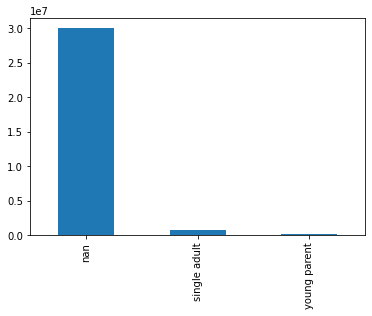

In [29]:
# creating bar chart of customer profiles with NaN
bar_with_nan = df_high['Customer Profile'].value_counts(dropna = False).plot.bar()

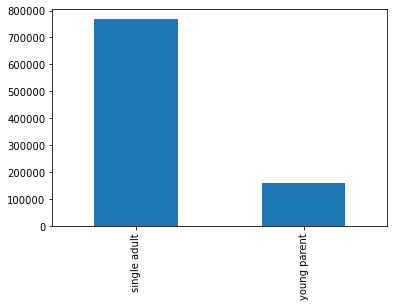

In [30]:
# creating bar chart of customer profiles without NaN
bar_without_nan = df_high['Customer Profile'].value_counts().plot.bar()

In [32]:
# exporting bar_with_nan chart
bar_with_nan.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_profiles_with_nan.png'))


In [33]:
# exporting bar_without_nan chart
bar_without_nan.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_profiles_without_nan.png'))


## 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [40]:
# getting a sense for this profile (max 3 decimal)
df_single_adult.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,768639.000,768639.000,768639.000,768639.000,768639.000,723759.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000,768639.000
mean,1712228.311,103455.821,16.523,2.764,13.597,11.384,24037.840,9.319,0.532,71.069,5.504,7.672,31.912,11.996,10.537,50.138,0.000,101764.624
std,987040.255,59296.889,16.738,2.127,4.252,8.789,14566.698,7.480,0.499,31.321,6.540,3.878,23.844,147.771,6.860,18.150,0.000,43323.299
min,9.000,11.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.000,0.000,19.000,0.000,25903.000
25%,858698.000,52572.000,5.000,1.000,11.000,5.000,11009.000,4.000,0.000,38.000,1.000,4.700,13.000,7.027,6.000,34.000,0.000,69312.000
50%,1715002.000,103342.000,11.000,3.000,14.000,8.000,23554.000,7.000,1.000,69.000,1.000,7.400,25.000,7.783,8.000,50.000,0.000,98299.000
75%,2565563.000,155031.000,22.000,5.000,17.000,15.000,35946.000,13.000,1.000,99.000,15.000,10.600,44.000,8.557,13.000,66.000,0.000,130288.000
max,3421080.000,206199.000,99.000,6.000,23.000,30.000,49685.000,117.000,1.000,129.000,15.000,15.000,99.000,33337.767,30.000,81.000,0.000,584097.000


In [41]:
# getting a sense for this profile (max 3 decimal)
df_young_parent.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,160898.000,160898.000,160898.000,160898.000,160898.000,153726.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000,160898.000
mean,1700355.522,101950.770,20.092,2.727,13.355,9.647,25135.185,10.546,0.595,89.976,18.000,7.654,39.746,8.982,8.662,34.338,2.012,86386.779
std,987630.983,58827.883,18.687,2.068,4.431,7.851,15335.002,8.163,0.491,8.553,0.000,3.827,26.153,47.994,5.799,9.665,0.816,34859.007
min,10.000,59.000,1.000,0.000,0.000,0.000,15.000,1.000,0.000,56.000,18.000,1.000,5.000,1.100,0.000,18.000,1.000,26293.000
25%,838319.000,51079.000,6.000,1.000,10.000,4.000,11212.000,5.000,0.000,92.000,18.000,4.700,18.000,7.116,5.000,26.000,1.000,62907.000
50%,1692182.500,100434.000,14.000,3.000,13.000,7.000,24834.000,9.000,1.000,92.000,18.000,7.200,34.000,7.774,7.000,35.000,2.000,80059.000
75%,2550797.000,152612.000,28.000,5.000,16.000,12.000,38985.000,14.000,1.000,92.000,18.000,11.000,56.000,8.481,10.000,43.000,3.000,100045.000
max,3421051.000,206166.000,99.000,6.000,23.000,30.000,49583.000,92.000,1.000,102.000,18.000,15.000,99.000,4769.962,30.000,50.000,3.000,551849.000


#### average_price_per order seems odd (probably because of the 'prices'-problem). But I will do nothing because for comparing both datasets the basis for this column is the same

#### 'single adult' max_order: max: 99, min: 5, mean: 31,92
#### 'single adult' average_price_order: max: 33337.767, min 1, mean: 11,996
#### 'young_parent' max_order: max: 99, min: 5, mean: 39.746
#### 'young_parent' average_price_order: max: 4769.962, min 1,1, mean: 8,982
#### 'wealthy' max_order: max: 99, min: 5, mean: 34,651
#### 'wealthy' average_price_order: max: 99999, min 1, mean: 22,405
#### 'complete df' max_order: max: 99, min: 5, mean: 34,426
#### 'complete df' average_price_order: max: 99999, min 1, mean: 11,934

## 08. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [39]:
# subsetting region_1
df_region_1 = df_high.loc[df_high['Region'].isin(['Region_1'])]

In [56]:
# subsetting region_2
df_region_2 = df_high.loc[df_high['Region'].isin(['Region_2'])]

In [60]:
# subsetting region_3
df_region_3 = df_high.loc[df_high['Region'].isin(['Region_3'])]

In [66]:
# subsetting region_4
df_region_4 = df_high.loc[df_high['Region'].isin(['Region_4'])]

In [40]:
df_region_1.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
1441,1403849,109,3,3,17,9.0,196,5,0,Soda,...,Female,Connecticut,67,7/29/2018,1,married,41805,Region_1,NaN,NaN
1442,3116901,109,5,0,7,26.0,47144,5,0,Unsweetened Original Almond Breeze Almond Milk,...,Female,Connecticut,67,7/29/2018,1,married,41805,Region_1,NaN,NaN
1443,1382150,109,6,1,9,15.0,5450,8,0,Small Hass Avocado,...,Female,Connecticut,67,7/29/2018,1,married,41805,Region_1,NaN,NaN
1444,3116901,109,5,0,7,26.0,9387,18,0,Granny Smith Apples,...,Female,Connecticut,67,7/29/2018,1,married,41805,Region_1,NaN,NaN
1445,1403849,109,3,3,17,9.0,11777,1,0,Red Raspberries,...,Female,Connecticut,67,7/29/2018,1,married,41805,Region_1,NaN,NaN


In [58]:
df_region_2.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
59,2968173,15,15,1,9,7.0,196,2,0,Soda,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
60,1870022,15,17,2,16,8.0,196,6,1,Soda,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
61,1911383,15,18,2,11,7.0,196,1,1,Soda,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
62,2715276,15,21,1,9,7.0,196,1,1,Soda,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
63,487368,15,22,1,10,14.0,196,1,1,Soda,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN


In [61]:
df_region_3.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN


In [67]:
df_region_4.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
335,1573906,21,10,3,10,6.0,196,2,0,Soda,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
336,3341737,21,33,1,12,30.0,49235,14,0,Organic Half & Half,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
337,1082944,21,14,1,9,10.0,47766,6,0,Organic Avocado,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
338,774475,21,16,1,11,7.0,47766,4,1,Organic Avocado,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
339,77791,21,19,3,9,8.0,47766,13,1,Organic Avocado,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN


In [43]:
# subsetting 'single_adult' of region_1
df_region_1_sa = df_region_1.loc[df_region_1['Customer Profile'].isin(['single adult'])]

In [57]:
# subsetting 'single_adult' of region_2
df_region_2_sa = df_region_2.loc[df_region_2['Customer Profile'].isin(['single adult'])]

In [68]:
# subsetting 'single_adult' of region_3
df_region_3_sa = df_region_3.loc[df_region_3['Customer Profile'].isin(['single adult'])]

In [70]:
# subsetting 'single_adult' of region_4
df_region_4_sa = df_region_4.loc[df_region_4['Customer Profile'].isin(['single adult'])]

In [80]:
# subsetting 'young parent' of region_1
df_region_1_yp = df_region_1.loc[df_region_1['Customer Profile'].isin(['young parent'])]

In [83]:
# subsetting 'young parent' of region_2
df_region_2_yp = df_region_2.loc[df_region_2['Customer Profile'].isin(['young parent'])]

In [84]:
# subsetting 'young parent' of region_3
df_region_3_yp = df_region_3.loc[df_region_3['Customer Profile'].isin(['young parent'])]

In [85]:
# subsetting 'young parent' of region_4
df_region_4_yp = df_region_4.loc[df_region_4['Customer Profile'].isin(['young parent'])]

In [45]:
df_region_1_sa.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
7878,1706621,1519,13,1,15,3.0,2229,28,0,Uncrustables Peanut Butter & Strawberry Spread...,...,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Region_1,NaN,single adult
7879,1482006,1519,20,2,10,6.0,2229,21,1,Uncrustables Peanut Butter & Strawberry Spread...,...,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Region_1,NaN,single adult
7951,1706621,1519,13,1,15,3.0,45013,19,0,Apple Sauce,...,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,Region_1,NaN,single adult
11902,51670,2335,10,6,7,10.0,33640,41,0,"Baked Beans, Vegetarian",...,Male,Rhode Island,25,4/21/2019,0,single,43338,Region_1,NaN,single adult
11903,2872770,2335,21,1,7,7.0,33640,42,1,"Baked Beans, Vegetarian",...,Male,Rhode Island,25,4/21/2019,0,single,43338,Region_1,NaN,single adult


In [59]:
df_region_2_sa.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
4152,1512232,423,2,2,10,8.0,26914,1,0,Bean & Cheese Burrito,...,Female,Indiana,22,9/28/2019,0,single,47180,Region_2,NaN,single adult
4153,1665683,423,3,2,11,7.0,26914,1,1,Bean & Cheese Burrito,...,Female,Indiana,22,9/28/2019,0,single,47180,Region_2,NaN,single adult
4154,2087896,423,5,1,13,6.0,26914,1,1,Bean & Cheese Burrito,...,Female,Indiana,22,9/28/2019,0,single,47180,Region_2,NaN,single adult
4155,98810,423,9,2,13,7.0,26914,1,1,Bean & Cheese Burrito,...,Female,Indiana,22,9/28/2019,0,single,47180,Region_2,NaN,single adult
4156,438906,423,11,2,11,21.0,26914,1,1,Bean & Cheese Burrito,...,Female,Indiana,22,9/28/2019,0,single,47180,Region_2,NaN,single adult


In [69]:
df_region_3_sa.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
5111,3010461,691,4,6,12,9.0,30162,3,0,Teriyaki & Pineapple Chicken Meatballs,...,Female,North Carolina,24,9/1/2018,0,single,56479,Region_3,NaN,single adult
5114,1682487,691,7,0,15,4.0,130,1,0,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,Female,North Carolina,24,9/1/2018,0,single,56479,Region_3,NaN,single adult
5115,2343357,691,12,4,13,13.0,130,1,1,Vanilla Milk Chocolate Almond Ice Cream Bars M...,...,Female,North Carolina,24,9/1/2018,0,single,56479,Region_3,NaN,single adult
5129,119829,691,16,2,16,2.0,22028,4,0,Grilled Chicken Taquitos,...,Female,North Carolina,24,9/1/2018,0,single,56479,Region_3,NaN,single adult
6068,2300656,1024,21,0,12,0.0,5769,1,0,Organic Chicken Stock,...,Male,Arkansas,52,2/22/2018,0,single,100515,Region_3,NaN,single adult


In [71]:
df_region_4_sa.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
357,1806047,21,21,1,9,7.0,7963,8,0,Gluten Free Whole Grain Bread,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,single adult
360,77791,21,19,3,9,8.0,16965,2,0,Chocolate Ice Cream,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,single adult
374,77791,21,19,3,9,8.0,9076,7,0,Blueberries,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,single adult
506,77791,21,19,3,9,8.0,21508,1,0,Dairy Free Coconut Milk Vanilla Bean Frozen De...,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,single adult
507,77791,21,19,3,9,8.0,8668,3,0,Homemade Vanilla Ice Cream,...,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,single adult


In [81]:
df_region_1_yp.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
29062,326210,4972,13,5,15,26.0,28378,10,0,Stage 2 Sweet Potato Corn & Apple Baby Food,...,Male,New Jersey,36,11/7/2019,3,married,81237,Region_1,NaN,young parent
29079,326210,4972,13,5,15,26.0,48589,14,0,"Organic Baby Food Carrot, Sweet Potato & Brown...",...,Male,New Jersey,36,11/7/2019,3,married,81237,Region_1,NaN,young parent
29080,1323792,4972,9,2,16,30.0,2923,17,0,"Mighty 4 Essential Tots Spinach, Kiwi, Barley ...",...,Male,New Jersey,36,11/7/2019,3,married,81237,Region_1,NaN,young parent
29118,326210,4972,13,5,15,26.0,39977,9,0,Pumpkin & Spinach Stage 2 Baby Food,...,Male,New Jersey,36,11/7/2019,3,married,81237,Region_1,NaN,young parent
29122,326210,4972,13,5,15,26.0,4753,8,0,Organic Apple Raisin & Quinoa Stage 2 Baby Food,...,Male,New Jersey,36,11/7/2019,3,married,81237,Region_1,NaN,young parent


In [86]:
df_region_2_yp.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
2893,2684151,290,22,6,10,7.0,45309,32,0,Purple Carrot & blueberry Puffs,...,Female,Michigan,24,5/18/2019,1,married,55550,Region_2,NaN,young parent
3508,2684151,290,22,6,10,7.0,15076,33,0,Graduates Fruit Pick-Ups Diced Apples,...,Female,Michigan,24,5/18/2019,1,married,55550,Region_2,NaN,young parent
53954,103955,8661,32,4,15,9.0,3858,24,0,2nd Foods Chicken & Gravy,...,Male,South Dakota,19,3/1/2017,3,living with parents and siblings,52855,Region_2,NaN,young parent
54095,103955,8661,32,4,15,9.0,24011,25,0,2nd Foods - Beef & Beef Gravy,...,Male,South Dakota,19,3/1/2017,3,living with parents and siblings,52855,Region_2,NaN,young parent
54194,103955,8661,32,4,15,9.0,7512,26,0,2nd Foods Ham & Ham Gravy,...,Male,South Dakota,19,3/1/2017,3,living with parents and siblings,52855,Region_2,NaN,young parent


In [87]:
df_region_3_yp.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
41448,3373437,6773,16,0,15,22.0,31955,8,0,Organic Banana Puffs,...,Male,South Carolina,26,12/27/2018,2,married,97311,Region_3,NaN,young parent
41554,1641973,6773,2,5,19,5.0,34974,5,0,Baby Mum-Mum Banana Rice Rusks,...,Male,South Carolina,26,12/27/2018,2,married,97311,Region_3,NaN,young parent
41555,3084658,6773,9,0,12,8.0,34974,1,1,Baby Mum-Mum Banana Rice Rusks,...,Male,South Carolina,26,12/27/2018,2,married,97311,Region_3,NaN,young parent
41556,743779,6773,15,6,11,6.0,34974,10,1,Baby Mum-Mum Banana Rice Rusks,...,Male,South Carolina,26,12/27/2018,2,married,97311,Region_3,NaN,young parent
58124,3185056,9364,10,5,16,5.0,22678,1,0,Baby Fresh Pampers Baby Wipes Baby Fresh,...,Female,Oklahoma,40,10/26/2017,1,married,29535,Region_3,NaN,young parent


In [88]:
df_region_4_yp.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
3982,2332460,420,21,5,17,11.0,14408,1,0,Unflavored Oral Electrolyte Solution,...,Female,Hawaii,26,10/17/2018,2,married,97248,Region_4,NaN,young parent
4030,58188,420,3,6,13,23.0,30161,7,0,"Face, Hand & Baby Wipes Fragrance Free",...,Female,Hawaii,26,10/17/2018,2,married,97248,Region_4,NaN,young parent
4064,1071449,420,14,5,19,1.0,9677,2,0,Safety Swabs,...,Female,Hawaii,26,10/17/2018,2,married,97248,Region_4,NaN,young parent
4072,3180788,420,16,2,18,1.0,44937,2,0,Baby Eczema Therapy Moisturizing Cream Baby Lo...,...,Female,Hawaii,26,10/17/2018,2,married,97248,Region_4,NaN,young parent
4073,3180788,420,16,2,18,1.0,29875,4,0,Fresh Scent Gentle Saline Wipes for Stuffy Noses,...,Female,Hawaii,26,10/17/2018,2,married,97248,Region_4,NaN,young parent


In [51]:
# counting unique user_ids
df_region_1_sa['user_id'].nunique()

6358

In [54]:
df_region_1['user_id'].nunique()

28581

In [52]:
# comparing describtive statistices for region_1
df_region_1.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5172861.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5463882.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000
mean,1708338.286,102761.282,17.922,2.738,13.410,10.774,25590.051,8.376,0.608,71.230,9.943,7.781,34.605,11.543,9.925,49.606,1.505,99745.286
std,987377.914,59779.635,17.662,2.087,4.259,8.565,14081.499,7.137,0.488,38.200,6.284,4.241,24.898,153.012,6.648,18.527,1.119,42703.706
min,4.000,7.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,26095.000
25%,853858.000,50932.000,5.000,1.000,10.000,5.000,13548.000,3.000,0.000,31.000,4.000,4.200,14.000,6.979,6.000,33.000,1.000,67281.000
50%,1709615.000,101803.000,12.000,3.000,13.000,7.000,25232.000,6.000,1.000,83.000,9.000,7.400,28.000,7.769,7.000,50.000,2.000,96905.000
75%,2561664.000,154861.000,25.000,5.000,16.000,14.000,37971.000,12.000,1.000,107.000,16.000,11.200,48.000,8.577,12.000,66.000,3.000,128336.000
max,3421074.000,206200.000,99.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,584097.000


In [44]:
df_region_1_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,134114.000,134114.000,134114.000,134114.000,134114.000,126094.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000
mean,1711600.271,102764.007,16.309,2.752,13.630,11.528,23971.683,9.234,0.529,71.113,5.557,7.675,31.477,11.733,10.635,50.073,0.000,101624.252
std,989118.194,60264.131,16.660,2.122,4.262,8.891,14559.458,7.367,0.499,31.216,6.560,3.893,23.754,127.052,6.893,18.425,0.000,45040.062
min,24.000,34.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.100,0.000,19.000,0.000,26598.000
25%,853591.000,51136.000,5.000,1.000,11.000,5.000,10978.000,4.000,0.000,38.000,1.000,4.700,13.000,7.011,6.000,34.000,0.000,68369.000
50%,1714244.000,99064.500,10.000,3.000,14.000,8.000,23400.000,7.000,1.000,69.000,1.000,7.400,24.000,7.763,8.000,50.000,0.000,97549.000
75%,2567376.000,157495.000,22.000,5.000,17.000,16.000,35887.000,13.000,1.000,99.000,15.000,10.700,43.000,8.555,14.000,67.000,0.000,130254.000
max,3420985.000,206188.000,99.000,6.000,23.000,30.000,49685.000,69.000,1.000,129.000,15.000,15.000,99.000,16672.667,30.000,81.000,0.000,584097.000


#### In region_1 live 6.358  'Single adults' of 28.581 = 22,24%
#### In region_1 the orders of 'Single adults' are 134.114 from 5.464.685 = 2,45%.
#### In region_1 the 'order_number_history' for 'Single adults' lies at 16,31 vs. 17,99 for the whole data set
#### In region_1 the mean of 'days_since_prior_order' for 'Single adults' lies at 11,53 vs. 10,77 for the whole dataset
#### In region_1 the mean of 'add_to_cart_order' for 'Single adults' lies at 9,23 vs. 8,34 for the whole dataset
#### In region_1 the mean of 'max_order' for 'Single adults' lies at 31,48 vs. 34,61 for the whole dataset
#### In region_1 the mean of 'Age' for 'Single adults' lies at 50,07 vs. 49,61 for the whole data set.
#### The income difference is quite small, 'Single adults' mean income lies at 101.624 vs. 99.745 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both. The 'average_price_order' lies at arroung 11,5. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8

In [64]:
# counting unique user_ids
df_region_2_sa['user_id'].nunique()

8429

In [65]:
df_region_2['user_id'].nunique()

38376

In [62]:
# comparing describtive statistices for region_2
df_region_2.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,6868419.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,7260306.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000
mean,1712476.198,103020.757,17.603,2.742,13.429,10.893,25610.922,8.354,0.603,71.181,9.916,7.792,33.931,12.682,10.020,49.451,1.490,100380.648
std,986434.824,59359.289,17.414,2.091,4.251,8.609,14082.841,7.130,0.489,38.209,6.281,4.239,24.564,176.615,6.667,18.411,1.115,44633.066
min,6.000,14.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25903.000
25%,860762.000,52088.000,5.000,1.000,10.000,5.000,13575.000,3.000,0.000,31.000,4.000,4.200,14.000,6.988,6.000,34.000,0.000,67652.000
50%,1711953.000,102731.000,12.000,3.000,13.000,8.000,25340.000,6.000,1.000,83.000,9.000,7.400,27.000,7.785,8.000,49.000,1.000,97430.000
75%,2566650.000,154151.000,24.000,5.000,16.000,14.000,37947.000,11.000,1.000,107.000,16.000,11.300,47.000,8.600,13.000,65.000,2.000,128801.000
max,3421075.000,206209.000,99.000,6.000,23.000,30.000,49688.000,109.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,579397.000


In [63]:
df_region_2_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,180527.000,180527.000,180527.000,180527.000,180527.000,170108.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000
mean,1710209.282,102603.191,16.459,2.769,13.610,11.413,23979.886,9.372,0.532,71.241,5.507,7.662,31.588,11.886,10.516,50.180,0.000,101789.527
std,983754.880,59070.486,16.647,2.127,4.280,8.818,14541.300,7.587,0.499,31.373,6.541,3.874,23.624,161.839,6.828,17.964,0.000,42965.429
min,14.000,38.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.000,0.000,19.000,0.000,25903.000
25%,866759.000,52865.000,5.000,1.000,10.000,5.000,10890.000,4.000,0.000,38.000,1.000,4.700,13.000,7.028,6.000,35.000,0.000,70052.000
50%,1706827.000,101621.000,11.000,3.000,14.000,8.000,23495.000,7.000,1.000,69.000,1.000,7.400,25.000,7.790,8.000,50.000,0.000,98359.000
75%,2559494.500,152477.000,22.000,5.000,17.000,15.000,35887.000,13.000,1.000,99.000,15.000,10.600,44.000,8.556,13.000,65.000,0.000,129613.000
max,3420950.000,206158.000,99.000,6.000,23.000,30.000,49685.000,97.000,1.000,129.000,15.000,15.000,99.000,25009.425,30.000,81.000,0.000,544248.000


#### In region_2 live 8.429  'Single adults' of 38.376 = 21,96%
#### In region_2 the orders of 'Single adults' are 180.527 from 7.261.513= 2,49%.
#### In region_2 the 'order_number_history' for 'Single adults' lies at 16,46 vs. 17,60 for the whole data set
#### In region_2 the mean of 'days_since_prior_order' for 'Single adults' lies at 11,43 vs. 10,90 for the whole dataset
#### In region_2 the mean of 'add_to_cart_order' for 'Single adults' lies at 9,37 vs. 8,35 for the whole dataset
#### In region_2 the mean of 'max_order' for 'Single adults' lies at 31,59 vs. 33,93 for the whole dataset
#### In region_2 the mean of 'average_price_order' for 'Single adults' lies at 11,89 vs. 12,69 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_2 the mean of 'Age' for 'Single adults' lies at 50,18 vs. 49,45 for the whole data set.
#### The income difference is quite small, 'Single adults' mean income lies at 101.789 vs. 100.380 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [72]:
# counting unique user_ids
df_region_3_sa['user_id'].nunique()

11827

In [73]:
# counting unique user_ids
df_region_3['user_id'].nunique()

54193

In [74]:
# comparing describtive statistices for region_3
df_region_3.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,9756873.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,10309442.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000
mean,1709595.066,102651.690,17.845,2.744,13.404,10.814,25603.873,8.365,0.606,71.211,9.912,7.794,34.482,12.119,9.956,49.320,1.504,99242.562
std,988203.698,59417.446,17.698,2.088,4.255,8.587,14077.601,7.163,0.489,38.233,6.282,4.241,25.056,160.555,6.674,18.545,1.119,42623.676
min,5.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25911.000
25%,852691.000,51037.000,5.000,1.000,10.000,5.000,13560.000,3.000,0.000,31.000,4.000,4.200,14.000,6.983,6.000,33.000,0.000,67134.000
50%,1708506.000,102044.000,12.000,3.000,13.000,7.000,25301.000,6.000,1.000,83.000,9.000,7.400,28.000,7.787,7.000,49.000,2.000,96195.000
75%,2566265.000,154336.000,25.000,5.000,16.000,14.000,37947.000,11.000,1.000,107.000,16.000,11.300,48.000,8.600,12.500,65.000,3.000,127544.000
max,3421081.000,206203.000,99.000,6.000,23.000,30.000,49688.000,137.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,591089.000


In [75]:
df_region_3_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,257299.000,257299.000,257299.000,257299.000,257299.000,242321.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000
mean,1714951.211,103230.671,16.582,2.768,13.589,11.396,24176.155,9.369,0.534,71.020,5.486,7.677,32.025,13.486,10.546,49.782,0.000,102007.824
std,990231.684,59149.314,16.727,2.126,4.240,8.762,14589.960,7.589,0.499,31.335,6.533,3.877,23.841,180.461,6.831,18.142,0.000,43990.778
min,9.000,11.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.000,0.000,19.000,0.000,26061.000
25%,854706.000,52232.000,5.000,1.000,10.000,5.000,11136.000,4.000,0.000,38.000,1.000,4.700,13.000,7.035,6.000,34.000,0.000,69378.000
50%,1722999.000,103571.000,11.000,3.000,14.000,8.000,23848.000,7.000,1.000,69.000,1.000,7.400,25.000,7.789,8.000,50.000,0.000,98102.000
75%,2572606.500,155101.000,22.000,5.000,17.000,15.000,36315.000,13.000,1.000,99.000,15.000,10.600,45.000,8.558,13.000,65.000,0.000,130488.000
max,3421080.000,206185.000,99.000,6.000,23.000,30.000,49685.000,117.000,1.000,129.000,15.000,15.000,99.000,33337.767,30.000,81.000,0.000,578251.000


#### In region_3 live 11.827  'Single adults' of 54.193 = 21,82%
#### In region_3 the orders of 'Single adults' are 257.299 from 10.311.139= 2,50%.
#### In region_3 the 'order_number_history' for 'Single adults' lies at 16,59 vs. 17,85 for the whole data set
#### In region_3 the mean of 'days_since_prior_order' for 'Single adults' lies at 11,40 vs. 10,80 for the whole dataset
#### In region_3 the mean of 'add_to_cart_order' for 'Single adults' lies at 9,37 vs. 8,37 for the whole dataset
#### In region_3 the mean of 'max_order' for 'Single adults' lies at 32,00 vs. 34,49 for the whole dataset
#### In region_3 the mean of 'average_price_order' for 'Single adults' lies at 13,49 vs. 12,12 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_3 the mean of 'Age' for 'Single adults' lies at 49,79 vs. 49,32 for the whole data set.
#### The income difference is quite small, 'Single adults' mean income lies at 102.007 vs. 99.242 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [76]:
# counting unique user_ids
df_region_4_sa['user_id'].nunique()

8994

In [77]:
# counting unique user_ids
df_region_4['user_id'].nunique()

41481

In [78]:
# comparing describtive statistices for region_4
df_region_4.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7505128.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7926057.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000
mean,1710644.139,103318.736,17.972,2.741,13.405,10.755,25585.939,8.359,0.607,71.138,9.927,7.790,34.682,11.276,9.923,49.580,1.508,99546.021
std,987165.439,59425.687,17.732,2.091,4.232,8.549,14083.229,7.102,0.488,38.235,6.284,4.241,24.978,128.156,6.667,18.445,1.122,42712.307
min,2.000,2.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25937.000
25%,855045.000,51686.000,5.000,1.000,10.000,5.000,13535.000,3.000,0.000,31.000,4.000,4.200,14.000,6.982,6.000,34.000,1.000,67158.000
50%,1712396.000,103593.000,12.000,3.000,13.000,7.000,25272.000,6.000,1.000,83.000,9.000,7.400,28.000,7.780,7.000,50.000,2.000,96832.000
75%,2565079.000,154460.000,25.000,5.000,16.000,14.000,37917.000,11.000,1.000,107.000,16.000,11.200,49.000,8.589,12.000,66.000,3.000,127988.000
max,3421083.000,206206.000,99.000,6.000,23.000,30.000,49688.000,114.000,1.000,134.000,21.000,25.000,99.000,50006.250,30.000,81.000,3.000,593901.000


In [79]:
df_region_4_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,196699.000,196699.000,196699.000,196699.000,196699.000,185236.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000
mean,1710947.770,105004.561,16.650,2.762,13.572,11.244,23955.208,9.264,0.530,70.946,5.490,7.672,32.359,10.327,10.478,50.608,0.000,101519.350
std,984447.154,59002.776,16.888,2.133,4.237,8.726,14563.277,7.312,0.499,31.328,6.534,3.874,24.099,87.634,6.903,18.130,0.000,41538.649
min,20.000,12.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.100,0.000,19.000,0.000,26070.000
25%,860849.000,53346.000,5.000,1.000,11.000,5.000,11009.000,4.000,0.000,38.000,1.000,4.700,13.000,7.028,6.000,35.000,0.000,69178.000
50%,1713458.000,106106.000,11.000,3.000,14.000,8.000,23400.000,7.000,1.000,69.000,1.000,7.400,25.000,7.784,8.000,51.000,0.000,98882.000
75%,2559456.500,155624.500,23.000,5.000,17.000,15.000,35887.000,13.000,1.000,99.000,15.000,10.600,45.000,8.558,13.000,66.000,0.000,130549.000
max,3421033.000,206199.000,99.000,6.000,23.000,30.000,49685.000,88.000,1.000,129.000,15.000,15.000,99.000,11118.300,30.000,81.000,0.000,539810.000


#### In region_4 live 8.994  'Single adults' of 41.481 = 21,68%
#### In region_4 the orders of 'Single adults' are 196.699 from 7.927.227= 2,48%.
#### In region_4 the 'order_number_history' for 'Single adults' lies at 16,65 vs. 17,97 for the whole data set
#### In region_4 the mean of 'days_since_prior_order' for 'Single adults' lies at 11,24 vs. 10,80 for the whole dataset
#### In region_4 the mean of 'add_to_cart_order' for 'Single adults' lies at 9,26 vs. 8,36 for the whole dataset
#### In region_4 the mean of 'max_order' for 'Single adults' lies at 32,36 vs. 34,68 for the whole dataset
#### In region_4 the mean of 'average_price_order' for 'Single adults' lies at 10,33 vs. 11,28 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_4 the mean of 'Age' for 'Single adults' lies at 50,61 vs. 49,58 for the whole data set.
#### The income difference is quite small, 'Single adults' mean income lies at 101.519 vs. 99.546 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [89]:
# counting unique user_ids
df_region_1_yp['user_id'].nunique()

2056

In [90]:
# counting unique user_ids
df_region_1['user_id'].nunique()

28581

In [91]:
# comparing describtive statistices for region_1
df_region_1.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5172861.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5463882.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000,5464685.000
mean,1708338.286,102761.282,17.922,2.738,13.410,10.774,25590.051,8.376,0.608,71.230,9.943,7.781,34.605,11.543,9.925,49.606,1.505,99745.286
std,987377.914,59779.635,17.662,2.087,4.259,8.565,14081.499,7.137,0.488,38.200,6.284,4.241,24.898,153.012,6.648,18.527,1.119,42703.706
min,4.000,7.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,26095.000
25%,853858.000,50932.000,5.000,1.000,10.000,5.000,13548.000,3.000,0.000,31.000,4.000,4.200,14.000,6.979,6.000,33.000,1.000,67281.000
50%,1709615.000,101803.000,12.000,3.000,13.000,7.000,25232.000,6.000,1.000,83.000,9.000,7.400,28.000,7.769,7.000,50.000,2.000,96905.000
75%,2561664.000,154861.000,25.000,5.000,16.000,14.000,37971.000,12.000,1.000,107.000,16.000,11.200,48.000,8.577,12.000,66.000,3.000,128336.000
max,3421074.000,206200.000,99.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,584097.000


In [93]:
df_region_1_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,29226.000,29226.000,29226.000,29226.000,29226.000,27885.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000
mean,1689462.055,101077.156,18.649,2.666,13.253,9.868,25373.225,10.784,0.588,90.106,18.000,7.673,37.606,9.434,8.870,34.279,2.032,86309.557
std,984468.037,58641.707,17.558,2.060,4.430,7.836,15221.999,8.429,0.492,8.308,0.000,3.842,25.246,81.922,5.783,9.551,0.808,32909.060
min,434.000,127.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.000,5.000,1.100,1.000,18.000,1.000,26296.000
25%,832772.000,50740.000,6.000,1.000,10.000,5.000,12020.000,5.000,0.000,92.000,18.000,4.700,17.000,7.138,5.000,25.000,1.000,62589.000
50%,1683136.000,97969.000,13.000,2.000,13.000,7.000,25371.000,9.000,1.000,92.000,18.000,7.200,32.000,7.786,7.000,35.000,2.000,80228.000
75%,2518155.000,150661.000,26.000,5.000,16.000,13.000,39035.000,15.000,1.000,92.000,18.000,11.000,51.000,8.493,10.000,43.000,3.000,99432.000
max,3420652.000,206166.000,99.000,6.000,23.000,30.000,49583.000,76.000,1.000,102.000,18.000,15.000,99.000,4769.962,30.000,50.000,3.000,371450.000


#### In region_1 live 2.056 'Young Parents' of 28.581 = 7,19%
#### In region_1 the orders of 'Young Parents' are 29.226 from 5.464.685= 0,53%.
#### In region_1 the 'order_number_history' for 'Young Parents' lies at 18,65 vs. 17,92 for the whole data set
#### In region_1 the mean of 'days_since_prior_order' for 'Young Parents' lies at 9,87 vs. 10,77 for the whole dataset
#### In region_1 the mean of 'add_to_cart_order' for 'Young Parents' lies at 8,43 vs. 8,38 for the whole dataset
#### In region_1 the mean of 'max_order' for 'Young Parents' lies at 37,61 vs. 34,61 for the whole dataset
#### In region_1 the mean of 'average_price_order' for 'Young Parents' lies at 9,34 vs. 11,54 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_1 the mean of 'n_dependants' for 'Young Parents' lies at 2,03 vs. 1,51 for the whole data set. 
#### In region_1 the mean of 'Age' for 'Young Parents' lies at 34,28 vs. 49,61 for the whole data set.
#### The income difference is quite big, 'Young Parents' mean income lies at 86.309 vs. 99.745 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [94]:
# counting unique user_ids
df_region_2_yp['user_id'].nunique()

2704

In [96]:
# counting unique user_ids
df_region_2['user_id'].nunique()

38376

In [97]:
# comparing describtive statistices for region_2
df_region_2.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,6868419.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,7260306.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000,7261513.000
mean,1712476.198,103020.757,17.603,2.742,13.429,10.893,25610.922,8.354,0.603,71.181,9.916,7.792,33.931,12.682,10.020,49.451,1.490,100380.648
std,986434.824,59359.289,17.414,2.091,4.251,8.609,14082.841,7.130,0.489,38.209,6.281,4.239,24.564,176.615,6.667,18.411,1.115,44633.066
min,6.000,14.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25903.000
25%,860762.000,52088.000,5.000,1.000,10.000,5.000,13575.000,3.000,0.000,31.000,4.000,4.200,14.000,6.988,6.000,34.000,0.000,67652.000
50%,1711953.000,102731.000,12.000,3.000,13.000,8.000,25340.000,6.000,1.000,83.000,9.000,7.400,27.000,7.785,8.000,49.000,1.000,97430.000
75%,2566650.000,154151.000,24.000,5.000,16.000,14.000,37947.000,11.000,1.000,107.000,16.000,11.300,47.000,8.600,13.000,65.000,2.000,128801.000
max,3421075.000,206209.000,99.000,6.000,23.000,30.000,49688.000,109.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,579397.000


In [98]:
df_region_2_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,37570.000,37570.000,37570.000,37570.000,37570.000,35800.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000
mean,1710569.164,106741.178,20.144,2.708,13.351,9.695,24968.214,10.346,0.600,89.914,18.000,7.591,40.181,8.602,8.671,34.119,1.964,85576.286
std,979719.124,58653.173,18.502,2.089,4.487,7.899,15432.621,8.129,0.490,8.679,0.000,3.809,25.914,34.643,5.880,9.620,0.820,38728.843
min,69.000,152.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.100,5.000,1.100,1.000,18.000,1.000,26293.000
25%,856029.000,57782.000,6.000,1.000,10.000,4.000,10112.000,4.000,0.000,92.000,18.000,4.600,19.000,7.100,5.000,26.000,1.000,61477.000
50%,1715216.000,110131.000,14.000,3.000,13.000,7.000,24577.500,8.000,1.000,92.000,18.000,7.200,36.000,7.763,7.000,34.000,2.000,77952.000
75%,2549683.500,156344.000,28.000,5.000,17.000,12.000,38985.000,14.000,1.000,92.000,18.000,10.900,56.000,8.471,10.000,43.000,3.000,99137.000
max,3420813.000,206105.000,99.000,6.000,23.000,30.000,49583.000,92.000,1.000,102.000,18.000,15.000,99.000,3232.261,30.000,50.000,3.000,544896.000


#### In region_2 live 2.704 'Young Parents' of 38.376 = 7,05%
#### In region_2 the orders of 'Young Parents' are 37.570 from 7.261.513= 0,52%.
#### In region_2 the 'order_number_history' for 'Young Parents' lies at 20,14 vs. 17,60 for the whole data set
#### In region_2 the mean of 'days_since_prior_order' for 'Young Parents' lies at 9,7 vs. 10,90 for the whole dataset
#### In region_2 the mean of 'add_to_cart_order' for 'Young Parents' lies at 10,35 vs. 8,35 for the whole dataset
#### In region_2 the mean of 'max_order' for 'Young Parents' lies at 40,18 vs. 33,93 for the whole dataset
#### In region_2 the mean of 'average_price_order' for 'Young Parents' lies at 8,6 vs. 12,69 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_2 the mean of 'n_dependants' for 'Young Parents' lies at 1,96 vs. 1,49 for the whole data set.
#### In region_2 the mean of 'Age' for 'Young Parents' lies at 34,12 vs. 49,45 for the whole data set.
#### The income difference is quite big, 'Young Parents' mean income lies at 85.576 vs. 100.380 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [99]:
# counting unique user_ids
df_region_3_yp['user_id'].nunique()

3934

In [100]:
# counting unique user_ids
df_region_3['user_id'].nunique()

54193

In [101]:
# comparing describtive statistices for region_3
df_region_3.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,9756873.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,10309442.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000,10311139.000
mean,1709595.066,102651.690,17.845,2.744,13.404,10.814,25603.873,8.365,0.606,71.211,9.912,7.794,34.482,12.119,9.956,49.320,1.504,99242.562
std,988203.698,59417.446,17.698,2.088,4.255,8.587,14077.601,7.163,0.489,38.233,6.282,4.241,25.056,160.555,6.674,18.545,1.119,42623.676
min,5.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25911.000
25%,852691.000,51037.000,5.000,1.000,10.000,5.000,13560.000,3.000,0.000,31.000,4.000,4.200,14.000,6.983,6.000,33.000,0.000,67134.000
50%,1708506.000,102044.000,12.000,3.000,13.000,7.000,25301.000,6.000,1.000,83.000,9.000,7.400,28.000,7.787,7.000,49.000,2.000,96195.000
75%,2566265.000,154336.000,25.000,5.000,16.000,14.000,37947.000,11.000,1.000,107.000,16.000,11.300,48.000,8.600,12.500,65.000,3.000,127544.000
max,3421081.000,206203.000,99.000,6.000,23.000,30.000,49688.000,137.000,1.000,134.000,21.000,25.000,99.000,99999.000,30.000,81.000,3.000,591089.000


In [102]:
df_region_3_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,53927.000,53927.000,53927.000,53927.000,53927.000,51544.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000
mean,1705037.193,97812.164,20.704,2.764,13.400,9.542,24964.391,10.674,0.598,89.956,18.000,7.703,40.745,9.261,8.598,34.323,2.011,86180.692
std,988807.349,58114.261,19.646,2.062,4.418,7.908,15332.609,8.287,0.490,8.604,0.000,3.837,27.470,39.635,5.888,9.777,0.800,33864.755
min,10.000,59.000,1.000,0.000,0.000,0.000,15.000,1.000,0.000,56.000,18.000,1.000,5.000,1.100,0.000,18.000,1.000,26986.000
25%,841971.000,48958.000,6.000,1.000,10.000,4.000,10429.000,5.000,0.000,92.000,18.000,4.700,18.000,7.100,5.000,26.000,1.000,62553.000
50%,1695003.000,94624.000,14.000,3.000,13.000,7.000,24613.000,9.000,1.000,92.000,18.000,7.300,35.000,7.766,7.000,34.000,2.000,80059.000
75%,2564868.500,149869.000,29.000,5.000,16.000,12.000,38985.000,15.000,1.000,92.000,18.000,11.000,59.000,8.480,10.000,43.000,3.000,100338.000
max,3421051.000,206151.000,99.000,6.000,23.000,30.000,49583.000,90.000,1.000,102.000,18.000,15.000,99.000,2487.567,30.000,50.000,3.000,551849.000


#### In region_3 live 3.934 'Young Parents' of 54.193 = 7,26%
#### In region_3 the orders of 'Young Parents' are 53.927 from 10.311.139= 0,52%.
#### In region_3 the 'order_number_history' for 'Young Parents' lies at 20,70 vs. 17,85 for the whole data set
#### In region_3 the mean of 'days_since_prior_order' for 'Young Parents' lies at 9,54 vs. 10,80 for the whole dataset
#### In region_3 the mean of 'add_to_cart_order' for 'Young Parents' lies at 10,68 vs. 8,37 for the whole dataset
#### In region_3 the mean of 'max_order' for 'Young Parents' lies at 40.75 vs. 34,49 for the whole dataset
#### In region_3 the mean of 'average_price_order' for 'Young Parents' lies at 9,26 vs. 12,12 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_3 the mean of 'n_dependants' for 'Young Parents' lies at 2,01 vs. 1,49 for the whole data set.
#### In region_3 the mean of 'Age' for 'Young Parents' lies at 34,32 vs. 49,32 for the whole data set.
#### The income difference is quite big, 'Young Parents' mean income lies at 86.180 vs. 99.242 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [103]:
# counting unique user_ids
df_region_4_yp['user_id'].nunique()

2940

In [104]:
# counting unique user_ids
df_region_4['user_id'].nunique()

41481

In [105]:
# comparing describtive statistices for region_3
df_region_4.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7505128.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7926057.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000,7927227.000
mean,1710644.139,103318.736,17.972,2.741,13.405,10.755,25585.939,8.359,0.607,71.138,9.927,7.790,34.682,11.276,9.923,49.580,1.508,99546.021
std,987165.439,59425.687,17.732,2.091,4.232,8.549,14083.229,7.102,0.488,38.235,6.284,4.241,24.978,128.156,6.667,18.445,1.122,42712.307
min,2.000,2.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25937.000
25%,855045.000,51686.000,5.000,1.000,10.000,5.000,13535.000,3.000,0.000,31.000,4.000,4.200,14.000,6.982,6.000,34.000,1.000,67158.000
50%,1712396.000,103593.000,12.000,3.000,13.000,7.000,25272.000,6.000,1.000,83.000,9.000,7.400,28.000,7.780,7.000,50.000,2.000,96832.000
75%,2565079.000,154460.000,25.000,5.000,16.000,14.000,37917.000,11.000,1.000,107.000,16.000,11.200,49.000,8.589,12.000,66.000,3.000,127988.000
max,3421083.000,206206.000,99.000,6.000,23.000,30.000,49688.000,114.000,1.000,134.000,21.000,25.000,99.000,50006.250,30.000,81.000,3.000,593901.000


In [106]:
df_region_4_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,40175.000,40175.000,40175.000,40175.000,40175.000,38497.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000
mean,1692444.569,103661.766,20.272,2.737,13.370,9.581,25347.419,10.385,0.589,89.968,18.000,7.635,39.553,8.636,8.590,34.607,2.044,87477.528
std,995582.615,59667.131,18.276,2.062,4.394,7.737,15324.165,7.815,0.492,8.539,0.000,3.820,25.096,33.338,5.606,9.632,0.838,33688.521
min,329.000,125.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.000,5.000,1.650,1.000,18.000,1.000,27309.000
25%,821206.000,49311.000,6.000,1.000,10.000,4.000,12020.000,5.000,0.000,92.000,18.000,4.700,19.000,7.133,5.000,26.000,1.000,64103.000
50%,1677720.000,102083.000,15.000,3.000,13.000,7.000,25371.000,9.000,1.000,92.000,18.000,7.200,34.000,7.783,7.000,36.000,2.000,81640.000
75%,2563226.000,155961.000,29.000,5.000,16.000,12.000,38985.000,14.000,1.000,92.000,18.000,11.000,56.000,8.480,10.000,43.000,3.000,100132.000
max,3421009.000,206117.000,99.000,6.000,23.000,30.000,49583.000,79.000,1.000,102.000,18.000,15.000,99.000,2136.714,30.000,50.000,3.000,497453.000


#### In region_4 live 2.940  'Young parents' of 41.481 = 7,09%
#### In region_4 the orders of 'Young parents' are 40.175 from 7.927.227= 0,51%.
#### In region_4 the 'order_number_history' for 'Young parents' lies at 20,27 vs. 17,97 for the whole data set
#### In region_4 the mean of 'days_since_prior_order' for 'Young parents' lies at 9,58 vs. 10,80 for the whole dataset
#### In region_4 the mean of 'add_to_cart_order' for 'Young parents' lies at 10,39 vs. 8,36 for the whole dataset
#### In region_4 the mean of 'max_order' for 'Young parents' lies at 39,55 vs. 34,68 for the whole dataset
#### In region_4 the mean of 'average_price_order' for 'Young parents' lies at 8,64 vs. 11,28 for the whole data set. Because of the 'prices'-problem its better to look at the median and here both values lie at ca. 7,8
#### In region_4 the mean of 'Age' for 'Young parents' lies at 34,61 vs. 49,58 for the whole data set.
#### The income difference is quite big, 'Young parents' mean income lies at 87.477 vs. 99.546 for the whole dataset. 
#### 'Order_day_of_week' lies for both profile between Monday and Tuesday. Also the 'order_hour_of_day' lies between 1 and 2 pm. Prices lie at arroung 7,7 for both.

In [117]:
df_region_1_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,29226.000,29226.000,29226.000,29226.000,29226.000,27885.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000,29226.000
mean,1689462.055,101077.156,18.649,2.666,13.253,9.868,25373.225,10.784,0.588,90.106,18.000,7.673,37.606,9.434,8.870,34.279,2.032,86309.557
std,984468.037,58641.707,17.558,2.060,4.430,7.836,15221.999,8.429,0.492,8.308,0.000,3.842,25.246,81.922,5.783,9.551,0.808,32909.060
min,434.000,127.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.000,5.000,1.100,1.000,18.000,1.000,26296.000
25%,832772.000,50740.000,6.000,1.000,10.000,5.000,12020.000,5.000,0.000,92.000,18.000,4.700,17.000,7.138,5.000,25.000,1.000,62589.000
50%,1683136.000,97969.000,13.000,2.000,13.000,7.000,25371.000,9.000,1.000,92.000,18.000,7.200,32.000,7.786,7.000,35.000,2.000,80228.000
75%,2518155.000,150661.000,26.000,5.000,16.000,13.000,39035.000,15.000,1.000,92.000,18.000,11.000,51.000,8.493,10.000,43.000,3.000,99432.000
max,3420652.000,206166.000,99.000,6.000,23.000,30.000,49583.000,76.000,1.000,102.000,18.000,15.000,99.000,4769.962,30.000,50.000,3.000,371450.000


In [118]:
df_region_2_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,37570.000,37570.000,37570.000,37570.000,37570.000,35800.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000,37570.000
mean,1710569.164,106741.178,20.144,2.708,13.351,9.695,24968.214,10.346,0.600,89.914,18.000,7.591,40.181,8.602,8.671,34.119,1.964,85576.286
std,979719.124,58653.173,18.502,2.089,4.487,7.899,15432.621,8.129,0.490,8.679,0.000,3.809,25.914,34.643,5.880,9.620,0.820,38728.843
min,69.000,152.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.100,5.000,1.100,1.000,18.000,1.000,26293.000
25%,856029.000,57782.000,6.000,1.000,10.000,4.000,10112.000,4.000,0.000,92.000,18.000,4.600,19.000,7.100,5.000,26.000,1.000,61477.000
50%,1715216.000,110131.000,14.000,3.000,13.000,7.000,24577.500,8.000,1.000,92.000,18.000,7.200,36.000,7.763,7.000,34.000,2.000,77952.000
75%,2549683.500,156344.000,28.000,5.000,17.000,12.000,38985.000,14.000,1.000,92.000,18.000,10.900,56.000,8.471,10.000,43.000,3.000,99137.000
max,3420813.000,206105.000,99.000,6.000,23.000,30.000,49583.000,92.000,1.000,102.000,18.000,15.000,99.000,3232.261,30.000,50.000,3.000,544896.000


In [119]:
df_region_3_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,53927.000,53927.000,53927.000,53927.000,53927.000,51544.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000,53927.000
mean,1705037.193,97812.164,20.704,2.764,13.400,9.542,24964.391,10.674,0.598,89.956,18.000,7.703,40.745,9.261,8.598,34.323,2.011,86180.692
std,988807.349,58114.261,19.646,2.062,4.418,7.908,15332.609,8.287,0.490,8.604,0.000,3.837,27.470,39.635,5.888,9.777,0.800,33864.755
min,10.000,59.000,1.000,0.000,0.000,0.000,15.000,1.000,0.000,56.000,18.000,1.000,5.000,1.100,0.000,18.000,1.000,26986.000
25%,841971.000,48958.000,6.000,1.000,10.000,4.000,10429.000,5.000,0.000,92.000,18.000,4.700,18.000,7.100,5.000,26.000,1.000,62553.000
50%,1695003.000,94624.000,14.000,3.000,13.000,7.000,24613.000,9.000,1.000,92.000,18.000,7.300,35.000,7.766,7.000,34.000,2.000,80059.000
75%,2564868.500,149869.000,29.000,5.000,16.000,12.000,38985.000,15.000,1.000,92.000,18.000,11.000,59.000,8.480,10.000,43.000,3.000,100338.000
max,3421051.000,206151.000,99.000,6.000,23.000,30.000,49583.000,90.000,1.000,102.000,18.000,15.000,99.000,2487.567,30.000,50.000,3.000,551849.000


In [120]:
df_region_4_yp.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,40175.000,40175.000,40175.000,40175.000,40175.000,38497.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000,40175.000
mean,1692444.569,103661.766,20.272,2.737,13.370,9.581,25347.419,10.385,0.589,89.968,18.000,7.635,39.553,8.636,8.590,34.607,2.044,87477.528
std,995582.615,59667.131,18.276,2.062,4.394,7.737,15324.165,7.815,0.492,8.539,0.000,3.820,25.096,33.338,5.606,9.632,0.838,33688.521
min,329.000,125.000,1.000,0.000,0.000,0.000,63.000,1.000,0.000,56.000,18.000,1.000,5.000,1.650,1.000,18.000,1.000,27309.000
25%,821206.000,49311.000,6.000,1.000,10.000,4.000,12020.000,5.000,0.000,92.000,18.000,4.700,19.000,7.133,5.000,26.000,1.000,64103.000
50%,1677720.000,102083.000,15.000,3.000,13.000,7.000,25371.000,9.000,1.000,92.000,18.000,7.200,34.000,7.783,7.000,36.000,2.000,81640.000
75%,2563226.000,155961.000,29.000,5.000,16.000,12.000,38985.000,14.000,1.000,92.000,18.000,11.000,56.000,8.480,10.000,43.000,3.000,100132.000
max,3421009.000,206117.000,99.000,6.000,23.000,30.000,49583.000,79.000,1.000,102.000,18.000,15.000,99.000,2136.714,30.000,50.000,3.000,497453.000


#### The main difference for 'Young Parents' across regions lies with the mean of 'max_order': 1 = 37,61; 2 = 40,18; 3 = 40,75; 4 = 39,55; and with 'average_price_order': 1 = 9,4; 2 = 8,6; 3 = 9,3; 4 = 8,64; but here we should look at the median for a different opinion (because of the problem 'prices'-problem) and here the number lies for every region at ca. 7,8 - with no significant difference. Every other column seems not to be significantly different.

In [121]:
df_region_1_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,134114.000,134114.000,134114.000,134114.000,134114.000,126094.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000,134114.000
mean,1711600.271,102764.007,16.309,2.752,13.630,11.528,23971.683,9.234,0.529,71.113,5.557,7.675,31.477,11.733,10.635,50.073,0.000,101624.252
std,989118.194,60264.131,16.660,2.122,4.262,8.891,14559.458,7.367,0.499,31.216,6.560,3.893,23.754,127.052,6.893,18.425,0.000,45040.062
min,24.000,34.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.100,0.000,19.000,0.000,26598.000
25%,853591.000,51136.000,5.000,1.000,11.000,5.000,10978.000,4.000,0.000,38.000,1.000,4.700,13.000,7.011,6.000,34.000,0.000,68369.000
50%,1714244.000,99064.500,10.000,3.000,14.000,8.000,23400.000,7.000,1.000,69.000,1.000,7.400,24.000,7.763,8.000,50.000,0.000,97549.000
75%,2567376.000,157495.000,22.000,5.000,17.000,16.000,35887.000,13.000,1.000,99.000,15.000,10.700,43.000,8.555,14.000,67.000,0.000,130254.000
max,3420985.000,206188.000,99.000,6.000,23.000,30.000,49685.000,69.000,1.000,129.000,15.000,15.000,99.000,16672.667,30.000,81.000,0.000,584097.000


In [122]:
df_region_2_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,180527.000,180527.000,180527.000,180527.000,180527.000,170108.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000,180527.000
mean,1710209.282,102603.191,16.459,2.769,13.610,11.413,23979.886,9.372,0.532,71.241,5.507,7.662,31.588,11.886,10.516,50.180,0.000,101789.527
std,983754.880,59070.486,16.647,2.127,4.280,8.818,14541.300,7.587,0.499,31.373,6.541,3.874,23.624,161.839,6.828,17.964,0.000,42965.429
min,14.000,38.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.000,0.000,19.000,0.000,25903.000
25%,866759.000,52865.000,5.000,1.000,10.000,5.000,10890.000,4.000,0.000,38.000,1.000,4.700,13.000,7.028,6.000,35.000,0.000,70052.000
50%,1706827.000,101621.000,11.000,3.000,14.000,8.000,23495.000,7.000,1.000,69.000,1.000,7.400,25.000,7.790,8.000,50.000,0.000,98359.000
75%,2559494.500,152477.000,22.000,5.000,17.000,15.000,35887.000,13.000,1.000,99.000,15.000,10.600,44.000,8.556,13.000,65.000,0.000,129613.000
max,3420950.000,206158.000,99.000,6.000,23.000,30.000,49685.000,97.000,1.000,129.000,15.000,15.000,99.000,25009.425,30.000,81.000,0.000,544248.000


In [123]:
df_region_3_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,257299.000,257299.000,257299.000,257299.000,257299.000,242321.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000,257299.000
mean,1714951.211,103230.671,16.582,2.768,13.589,11.396,24176.155,9.369,0.534,71.020,5.486,7.677,32.025,13.486,10.546,49.782,0.000,102007.824
std,990231.684,59149.314,16.727,2.126,4.240,8.762,14589.960,7.589,0.499,31.335,6.533,3.877,23.841,180.461,6.831,18.142,0.000,43990.778
min,9.000,11.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.000,0.000,19.000,0.000,26061.000
25%,854706.000,52232.000,5.000,1.000,10.000,5.000,11136.000,4.000,0.000,38.000,1.000,4.700,13.000,7.035,6.000,34.000,0.000,69378.000
50%,1722999.000,103571.000,11.000,3.000,14.000,8.000,23848.000,7.000,1.000,69.000,1.000,7.400,25.000,7.789,8.000,50.000,0.000,98102.000
75%,2572606.500,155101.000,22.000,5.000,17.000,15.000,36315.000,13.000,1.000,99.000,15.000,10.600,45.000,8.558,13.000,65.000,0.000,130488.000
max,3421080.000,206185.000,99.000,6.000,23.000,30.000,49685.000,117.000,1.000,129.000,15.000,15.000,99.000,33337.767,30.000,81.000,0.000,578251.000


In [124]:
df_region_4_sa.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,196699.000,196699.000,196699.000,196699.000,196699.000,185236.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000,196699.000
mean,1710947.770,105004.561,16.650,2.762,13.572,11.244,23955.208,9.264,0.530,70.946,5.490,7.672,32.359,10.327,10.478,50.608,0.000,101519.350
std,984447.154,59002.776,16.888,2.133,4.237,8.726,14563.277,7.312,0.499,31.328,6.534,3.874,24.099,87.634,6.903,18.130,0.000,41538.649
min,20.000,12.000,1.000,0.000,0.000,0.000,4.000,1.000,0.000,34.000,1.000,1.000,5.000,1.100,0.000,19.000,0.000,26070.000
25%,860849.000,53346.000,5.000,1.000,11.000,5.000,11009.000,4.000,0.000,38.000,1.000,4.700,13.000,7.028,6.000,35.000,0.000,69178.000
50%,1713458.000,106106.000,11.000,3.000,14.000,8.000,23400.000,7.000,1.000,69.000,1.000,7.400,25.000,7.784,8.000,51.000,0.000,98882.000
75%,2559456.500,155624.500,23.000,5.000,17.000,15.000,35887.000,13.000,1.000,99.000,15.000,10.600,45.000,8.558,13.000,66.000,0.000,130549.000
max,3421033.000,206199.000,99.000,6.000,23.000,30.000,49685.000,88.000,1.000,129.000,15.000,15.000,99.000,11118.300,30.000,81.000,0.000,539810.000


#### For 'Single Adults' there are no significant differences.

## 09. Produce suitable charts to illustrate your results and export them in your project folder.

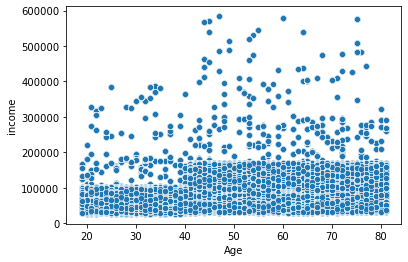

In [112]:
# scatterplot of relationship between age and income for 'single adult'
scatterplot_sa = sns.scatterplot(x = 'Age', y ='income', data = df_single_adult)

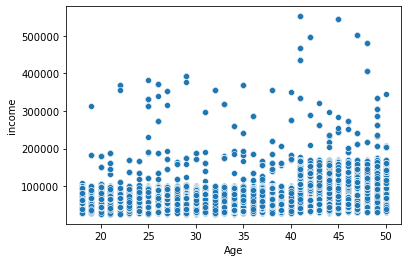

In [113]:
# scatterplot of relationship between age and income for 'young parent'
scatterplot_yp = sns.scatterplot(x = 'Age', y ='income', data = df_young_parent)

In [115]:
# exporting scatterplots
scatterplot_sa.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter_age_income_single_adult.png'))

In [116]:
# exporting scatterplots
scatterplot_yp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter_age_income_young_parent.png'))

## 10. Tidy up your script, export your final data set, and save your notebook.

In [129]:
# export the main dataframe df_high
df_high.to_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'ords_prods_cust_high_new.pkl'))

## 11. Further analysis for finishing achievement 4

In [3]:
df = pd.read_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'ords_prods_cust_high_new.pkl'))

In [4]:
# counting department_id
df['department_id'].value_counts (dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [11]:
# counting product_id
df['product_id'].value_counts (dropna = False)

24852    453164
13176    366403
21137    255988
21903    231772
47209    206799
          ...  
13248         1
48063         1
4383          1
37057         1
9767          1
Name: product_id, Length: 49628, dtype: int64

In [17]:
# checking what product_id 24852 is: banana dpid 4
df[df['product_id']==24852]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
347,2102674,21,11,1,15,12.0,24852,4,0,Banana,24,4,12.3,Mid-range products,Regularly busy,Busiest days,Most orders,33,Regular customer,7.120000,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
348,77791,21,19,3,9,8.0,24852,16,1,Banana,24,4,12.3,Mid-range products,Regularly busy,Least busy,Most orders,33,Regular customer,7.482353,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
349,1806047,21,21,1,9,7.0,24852,10,1,Banana,24,4,12.3,Mid-range products,Regularly busy,Busiest days,Most orders,33,Regular customer,7.370000,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
844,606677,43,1,1,18,NaN,24852,3,0,Banana,24,4,12.3,Mid-range products,Regularly busy,Busiest days,Average orders,11,Regular customer,10.880000,High spender,10.0,Frequent customer,Female,Tennessee,41,11/19/2018,1,married,123723,Region_3,NaN,NaN
845,656728,43,3,4,11,7.0,24852,1,1,Banana,24,4,12.3,Mid-range products,Least busy,Least busy,Most orders,11,Regular customer,7.540000,Low spender,10.0,Frequent customer,Female,Tennessee,41,11/19/2018,1,married,123723,Region_3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29890131,3272744,206192,7,0,18,7.0,24852,3,1,Banana,24,4,12.3,Mid-range products,Busiest day,Busiest days,Average orders,14,Regular customer,7.361538,Low spender,9.0,Frequent customer,Female,Wisconsin,57,12/12/2018,1,married,79305,Region_2,NaN,NaN
29890132,2775106,206192,8,4,13,11.0,24852,2,1,Banana,24,4,12.3,Mid-range products,Least busy,Least busy,Most orders,14,Regular customer,11.400000,High spender,9.0,Frequent customer,Female,Wisconsin,57,12/12/2018,1,married,79305,Region_2,NaN,NaN
29890133,1673383,206192,9,2,20,5.0,24852,4,1,Banana,24,4,12.3,Mid-range products,Regularly busy,Regularly busy,Average orders,14,Regular customer,7.316667,Low spender,9.0,Frequent customer,Female,Wisconsin,57,12/12/2018,1,married,79305,Region_2,NaN,NaN
29890134,3218816,206192,12,0,19,5.0,24852,3,1,Banana,24,4,12.3,Mid-range products,Busiest day,Busiest days,Average orders,14,Regular customer,6.880000,Low spender,9.0,Frequent customer,Female,Wisconsin,57,12/12/2018,1,married,79305,Region_2,NaN,NaN


In [18]:
# checking what product_id 13176 is: Bag of Organic Bananas dpid 4
df[df['product_id']==13176]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
34,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Least busy,Average orders,10,New customer,5.900000,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
35,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Least busy,Least busy,Most orders,10,New customer,7.125000,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1172,3205960,67,1,3,11,NaN,13176,3,0,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Least busy,Most orders,24,Regular customer,8.075000,Low spender,7.0,Frequent customer,Female,Iowa,66,6/5/2017,1,married,115696,Region_2,NaN,NaN
1173,970922,67,2,1,15,5.0,13176,4,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Busiest days,Most orders,24,Regular customer,6.516667,Low spender,7.0,Frequent customer,Female,Iowa,66,6/5/2017,1,married,115696,Region_2,NaN,NaN
1174,596585,67,3,1,13,7.0,13176,1,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Busiest days,Most orders,24,Regular customer,7.866667,Low spender,7.0,Frequent customer,Female,Iowa,66,6/5/2017,1,married,115696,Region_2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16330350,1889163,206209,2,3,17,7.0,13176,7,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Least busy,Most orders,13,Regular customer,7.677778,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region_2,NaN,NaN
16330351,1542354,206209,3,5,11,30.0,13176,6,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Regularly busy,Most orders,13,Regular customer,7.066667,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region_2,NaN,NaN
16330352,688306,206209,4,1,10,30.0,13176,2,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Regularly busy,Busiest days,Most orders,13,Regular customer,6.668750,Low spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region_2,NaN,NaN
16330353,2307371,206209,5,4,15,3.0,13176,3,1,Bag of Organic Bananas,24,4,10.3,Mid-range products,Least busy,Least busy,Most orders,13,Regular customer,11.033333,High spender,22.0,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region_2,NaN,NaN


In [19]:
# checking what product_id 21137 is:Organic Strawberries dpid 4
df[df['product_id']==21137]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
359,77791,21,19,3,9,8.0,21137,8,0,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Least busy,Most orders,33,Regular customer,7.482353,Low spender,7.5,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,Region_4,NaN,NaN
1401,2210120,98,7,5,14,5.0,21137,4,0,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Regularly busy,Most orders,14,Regular customer,7.720000,Low spender,25.0,Non-frequent customer,Female,Virginia,30,2/22/2018,2,married,58569,Region_3,NaN,NaN
1764,2899515,222,23,3,12,1.0,21137,3,0,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Least busy,Most orders,70,Loyal customer,8.575000,Low spender,5.0,Frequent customer,Female,Kentucky,76,4/1/2020,2,married,53488,Region_3,NaN,NaN
5519,1138408,778,33,6,15,5.0,21137,4,0,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Regularly busy,Most orders,42,Loyal customer,9.087500,Low spender,4.0,Frequent customer,Female,Idaho,78,11/19/2018,3,married,161489,Region_4,NaN,NaN
5520,758247,778,37,3,8,4.0,21137,4,1,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Least busy,Average orders,42,Loyal customer,8.271429,Low spender,4.0,Frequent customer,Female,Idaho,78,11/19/2018,3,married,161489,Region_4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31282216,442859,206075,3,0,10,10.0,21137,1,1,Organic Strawberries,24,4,7.3,Mid-range products,Busiest day,Busiest days,Most orders,9,New customer,8.093333,Low spender,14.0,Regular customer,Female,Michigan,78,12/18/2019,2,married,164260,Region_2,NaN,NaN
31282217,2526558,206075,5,1,13,30.0,21137,3,1,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Busiest days,Most orders,9,New customer,10.316667,High spender,14.0,Regular customer,Female,Michigan,78,12/18/2019,2,married,164260,Region_2,NaN,NaN
31282218,2974277,206075,7,2,13,14.0,21137,4,1,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Regularly busy,Most orders,9,New customer,9.400000,Low spender,14.0,Regular customer,Female,Michigan,78,12/18/2019,2,married,164260,Region_2,NaN,NaN
31282219,663193,206075,8,6,14,4.0,21137,2,1,Organic Strawberries,24,4,7.3,Mid-range products,Regularly busy,Regularly busy,Most orders,9,New customer,8.425000,Low spender,14.0,Regular customer,Female,Michigan,78,12/18/2019,2,married,164260,Region_2,NaN,NaN


In [20]:
# checking what product_id 21903 is:Organic Baby Spinach dpid 4
df[df['product_id']==21903]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
5918,456598,926,6,3,9,24.0,21903,7,0,Organic Baby Spinach,123,4,8.2,Mid-range products,Regularly busy,Least busy,Most orders,7,New customer,6.055556,Low spender,23.0,Non-frequent customer,Female,Delaware,32,2/13/2018,1,married,41138,Region_3,NaN,NaN
6241,689328,1126,3,0,10,30.0,21903,5,0,Organic Baby Spinach,123,4,8.2,Mid-range products,Busiest day,Busiest days,Most orders,10,New customer,8.450000,Low spender,25.5,Non-frequent customer,Male,Arkansas,39,6/18/2019,1,married,70969,Region_3,NaN,NaN
8766,1192415,1542,1,4,11,NaN,21903,7,0,Organic Baby Spinach,123,4,8.2,Mid-range products,Least busy,Least busy,Most orders,52,Loyal customer,8.457143,Low spender,7.0,Frequent customer,Female,Hawaii,44,11/5/2017,0,single,54139,Region_4,NaN,NaN
8767,1569086,1542,2,4,13,7.0,21903,5,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Least busy,Least busy,Most orders,52,Loyal customer,7.137500,Low spender,7.0,Frequent customer,Female,Hawaii,44,11/5/2017,0,single,54139,Region_4,NaN,NaN
8768,380807,1542,3,3,13,6.0,21903,4,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Regularly busy,Least busy,Most orders,52,Loyal customer,7.266667,Low spender,7.0,Frequent customer,Female,Hawaii,44,11/5/2017,0,single,54139,Region_4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31170603,1679574,206130,12,0,18,11.0,21903,5,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Busiest day,Busiest days,Average orders,16,Regular customer,7.480000,Low spender,8.0,Frequent customer,Male,Pennsylvania,58,10/23/2018,1,married,126859,Region_1,NaN,NaN
31170604,683919,206130,13,0,18,7.0,21903,3,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Busiest day,Busiest days,Average orders,16,Regular customer,8.650000,Low spender,8.0,Frequent customer,Male,Pennsylvania,58,10/23/2018,1,married,126859,Region_1,NaN,NaN
31170605,817997,206130,14,0,18,7.0,21903,3,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Busiest day,Busiest days,Average orders,16,Regular customer,7.383333,Low spender,8.0,Frequent customer,Male,Pennsylvania,58,10/23/2018,1,married,126859,Region_1,NaN,NaN
31170606,959973,206130,15,1,22,8.0,21903,4,1,Organic Baby Spinach,123,4,8.2,Mid-range products,Regularly busy,Busiest days,Average orders,16,Regular customer,8.683333,Low spender,8.0,Frequent customer,Male,Pennsylvania,58,10/23/2018,1,married,126859,Region_1,NaN,NaN


In [21]:
# checking what product_id 9767 is:Rosemary Medium Asiago Cheese Wedge dpid 16
df[df['product_id']==9767]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
26449320,1686872,59133,23,1,10,7.0,9767,5,0,Rosemary Medium Asiago Cheese Wedge,21,16,3.0,Low-range products,Regularly busy,Busiest days,Most orders,27,Regular customer,7.658824,Low spender,7.0,Frequent customer,Male,New Hampshire,61,7/26/2019,2,married,134716,Region_1,NaN,NaN


In [22]:
# checking what product_id 37057 is: Potato Bread 
df[df['product_id']==37057]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
4481151,2036759,31044,6,3,16,9.0,37057,7,0,Potato Bread,112,3,14.3,Mid-range products,Regularly busy,Least busy,Most orders,7,New customer,9.76,Low spender,8.0,Frequent customer,Male,Minnesota,71,12/19/2017,2,married,118316,Region_2,NaN,NaN


<AxesSubplot:>

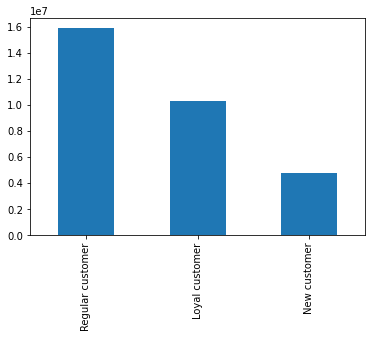

In [23]:
# chart for loyalty_flag
df['loyalty_flag'].value_counts().plot.bar()

In [6]:
pd.set_option('display.max_columns', None)

In [24]:
# counting loyalty_flag
df['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

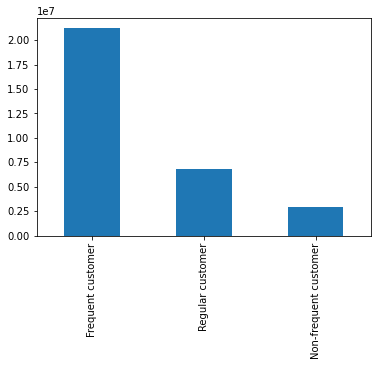

In [26]:
# chart for customer_frequency
bar = df['customer_frequency'].value_counts().plot.bar()

In [28]:
# saving chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_customer_frequency.png'))

In [20]:
# subsettting frequent customer of 'customer_frequency'
Df_fc = df[df['customer_frequency']=='Frequent customer']

In [21]:
Df_fc.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
59,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,5.466667,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
60,1870022,15,17,2,16,8.0,196,6,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,22,Regular customer,4.350000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
61,1911383,15,18,2,11,7.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,22,Regular customer,9.000000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
62,2715276,15,21,1,9,7.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,5.450000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
63,487368,15,22,1,10,14.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,6.000000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN


In [10]:
# subsettting regular customer of 'customer_frequency'
Df_rc = df[df['customer_frequency']=='Regular customer']

In [11]:
Df_rc.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
1260,1889835,82,1,3,15,NaN,196,6,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Most orders,19,Regular customer,8.755556,Low spender,11.5,Regular customer,Male,Oklahoma,60,5/16/2017,3,married,45982,Region_3,NaN,NaN
1261,499460,82,3,5,10,5.0,196,2,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,19,Regular customer,11.200000,High spender,11.5,Regular customer,Male,Oklahoma,60,5/16/2017,3,married,45982,Region_3,NaN,NaN
1262,2728456,82,4,0,11,16.0,196,1,1,Soda,77,7,9.0,Mid-range products,Busiest day,Busiest days,Most orders,19,Regular customer,6.272727,Low spender,11.5,Regular customer,Male,Oklahoma,60,5/16/2017,3,married,45982,Region_3,NaN,NaN
1263,2653743,82,6,4,9,13.0,196,5,1,Soda,77,7,9.0,Mid-range products,Least busy,Least busy,Most orders,19,Regular customer,4.940000,Low spender,11.5,Regular customer,Male,Oklahoma,60,5/16/2017,3,married,45982,Region_3,NaN,NaN
1264,1358880,82,9,1,10,30.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,19,Regular customer,6.044444,Low spender,11.5,Regular customer,Male,Oklahoma,60,5/16/2017,3,married,45982,Region_3,NaN,NaN


In [14]:
# subsettting non-frequent customer of 'customer_frequency'
Df_nfc = df[df['customer_frequency']=='Non-frequent customer']

In [15]:
Df_nfc

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Average orders,10,New customer,6.320,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Average orders,10,New customer,5.900,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.640,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range products,Least busy,Least busy,Average orders,10,New customer,5.200,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range products,Least busy,Least busy,Most orders,10,New customer,7.125,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404771,352875,164455,1,6,12,NaN,16838,1,0,Gummies,70,11,9.9,Mid-range products,Regularly busy,Regularly busy,Most orders,5,New customer,9.900,Low spender,30.0,Non-frequent customer,Male,Oklahoma,21,10/17/2017,2,living with parents and siblings,93199,Region_3,NaN,NaN
32404772,1624638,164455,2,6,9,30.0,16838,1,1,Gummies,70,11,9.9,Mid-range products,Regularly busy,Regularly busy,Most orders,5,New customer,9.900,Low spender,30.0,Non-frequent customer,Male,Oklahoma,21,10/17/2017,2,living with parents and siblings,93199,Region_3,NaN,NaN
32404773,24499,164455,3,4,8,30.0,16838,1,1,Gummies,70,11,9.9,Mid-range products,Least busy,Least busy,Average orders,5,New customer,9.900,Low spender,30.0,Non-frequent customer,Male,Oklahoma,21,10/17/2017,2,living with parents and siblings,93199,Region_3,NaN,NaN
32404774,2192778,164455,4,2,16,30.0,16838,1,1,Gummies,70,11,9.9,Mid-range products,Regularly busy,Regularly busy,Most orders,5,New customer,9.900,Low spender,30.0,Non-frequent customer,Male,Oklahoma,21,10/17/2017,2,living with parents and siblings,93199,Region_3,NaN,NaN


In [16]:
Df_fc.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,21204476.000,21204476.000,21204476.000,21204476.000,21204476.000,20424267.000,21204476.000,21204476.000,21204476.000,21204476.000,21204476.000,21201416.000,21204476.000,21204476.000,21204476.000,21204476.000,21204476.000,21204476.000
mean,1710108.145,103040.188,22.471,2.766,13.310,7.858,25601.703,8.280,0.659,71.182,9.927,7.791,43.633,11.698,6.299,49.479,1.502,100055.072
std,987205.272,59456.117,19.235,2.081,4.268,6.314,14064.336,7.069,0.474,38.295,6.283,4.230,24.767,154.434,2.034,18.497,1.118,43201.938
min,3.000,3.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25955.000
25%,855786.000,51496.000,8.000,1.000,10.000,4.000,13554.000,3.000,0.000,31.000,4.000,4.200,25.000,6.978,5.000,33.000,1.000,67708.000
50%,1710433.000,102731.000,17.000,3.000,13.000,6.000,25256.000,6.000,1.000,83.000,8.000,7.400,40.000,7.780,7.000,49.000,2.000,96918.000
75%,2564701.250,154378.000,32.000,5.000,16.000,9.000,37940.000,11.000,1.000,107.000,16.000,11.200,57.000,8.594,8.000,66.000,3.000,128322.000
max,3421083.000,206208.000,99.000,6.000,23.000,30.000,49688.000,137.000,1.000,134.000,21.000,25.000,99.000,99999.000,10.000,81.000,3.000,593901.000


In [17]:
Df_rc.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,6865113.000,6865113.000,6865113.000,6865113.000,6865113.000,6348526.000,6865113.000,6865113.000,6865113.000,6865113.000,6865113.000,6863814.000,6865113.000,6865113.000,6865113.000,6865113.000,6865113.000,6865113.000
mean,1711229.963,102488.836,8.879,2.701,13.607,15.532,25601.909,8.562,0.525,71.204,9.902,7.793,16.634,12.632,14.273,49.423,1.501,99404.430
std,987854.142,59371.863,6.343,2.103,4.208,8.542,14114.043,7.250,0.499,38.085,6.285,4.263,6.983,164.432,2.605,18.468,1.123,43336.581
min,16.000,2.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,10.500,18.000,0.000,25903.000
25%,855434.000,51161.000,4.000,1.000,11.000,8.000,13559.000,3.000,0.000,31.000,4.000,4.200,11.000,7.000,12.000,33.000,0.000,67109.000
50%,1709616.000,102033.000,7.000,2.000,14.000,14.000,25340.000,7.000,1.000,83.000,9.000,7.400,16.000,7.786,14.000,49.000,2.000,96793.000
75%,2566996.000,154011.000,13.000,5.000,17.000,21.000,37999.000,12.000,1.000,107.000,16.000,11.300,22.000,8.588,16.000,65.000,3.000,127814.000
max,3421081.000,206207.000,45.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,45.000,99999.000,20.000,81.000,3.000,590790.000


In [18]:
Df_nfc.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,2894975.000,2894975.000,2894975.000,2894975.000,2894975.000,2530488.000,2894975.000,2894975.000,2894975.000,2894975.000,2894975.000,2894457.000,2894975.000,2894975.000,2894975.000,2894975.000,2894975.000,2894975.000
mean,1709687.085,103151.458,5.104,2.653,13.686,22.791,25566.904,8.499,0.410,71.197,9.938,7.782,9.176,12.005,26.517,49.496,1.500,97542.011
std,987518.211,59804.801,3.306,2.110,4.173,8.804,14124.020,7.333,0.492,38.010,6.274,4.266,3.353,142.883,3.528,18.439,1.116,42160.616
min,2.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,20.500,18.000,0.000,25911.000
25%,852807.000,51322.000,3.000,1.000,11.000,16.000,13535.000,3.000,0.000,32.000,4.000,4.200,6.000,6.983,23.000,33.000,1.000,64558.000
50%,1712684.000,102837.000,5.000,2.000,14.000,28.000,25340.000,6.000,0.000,83.000,9.000,7.400,9.000,7.781,28.000,49.000,1.000,95689.000
75%,2564779.000,155492.000,7.000,5.000,17.000,30.000,37917.000,12.000,1.000,107.000,16.000,11.300,11.000,8.594,30.000,65.000,3.000,126696.000
max,3421060.000,206209.000,25.000,6.000,23.000,30.000,49688.000,98.000,1.000,134.000,21.000,25.000,25.000,99999.000,30.000,81.000,3.000,544217.000


In [4]:
# subsettting regular customer of 'loyalty_flag'
df_rclf = df[df['loyalty_flag']=='Regular customer']

In [23]:
df_rclf.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
59,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,5.466667,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
60,1870022,15,17,2,16,8.0,196,6,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,22,Regular customer,4.350000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
61,1911383,15,18,2,11,7.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,22,Regular customer,9.000000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
62,2715276,15,21,1,9,7.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,5.450000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN
63,487368,15,22,1,10,14.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,22,Regular customer,6.000000,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Region_2,NaN,NaN


In [5]:
# subsettting loyal customer of 'loyalty_flag'
df_lclf = df[df['loyalty_flag']=='Loyal customer']

In [25]:
df_lclf.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
1557,2040988,195,1,1,14,NaN,196,2,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,58,Loyal customer,11.200000,High spender,4.0,Frequent customer,Female,South Dakota,50,6/17/2017,2,married,70952,Region_2,NaN,NaN
1558,1680569,195,8,1,9,4.0,196,2,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,58,Loyal customer,8.366667,Low spender,4.0,Frequent customer,Female,South Dakota,50,6/17/2017,2,married,70952,Region_2,NaN,NaN
1559,276171,195,19,5,11,3.0,196,2,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,58,Loyal customer,10.950000,High spender,4.0,Frequent customer,Female,South Dakota,50,6/17/2017,2,married,70952,Region_2,NaN,NaN
1560,2744976,195,22,5,10,7.0,196,2,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Most orders,58,Loyal customer,11.200000,High spender,4.0,Frequent customer,Female,South Dakota,50,6/17/2017,2,married,70952,Region_2,NaN,NaN
1561,2781919,195,25,1,14,4.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Busiest days,Most orders,58,Loyal customer,11.200000,High spender,4.0,Frequent customer,Female,South Dakota,50,6/17/2017,2,married,70952,Region_2,NaN,NaN


In [6]:
# subsettting new customer of 'loyalty_flag'
df_nclf = df[df['loyalty_flag']=='New customer']

In [27]:
df_nclf.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range products,Regularly busy,Regularly busy,Average orders,10,New customer,6.320,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Average orders,10,New customer,5.900,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.640,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range products,Least busy,Least busy,Average orders,10,New customer,5.200,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range products,Least busy,Least busy,Most orders,10,New customer,7.125,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN


In [7]:
df_rclf.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,15876776.000,15876776.000,15876776.000,15876776.000,15876776.000,15081691.000,15876776.000,15876776.000,15876776.000,15876776.000,15876776.000,15874128.000,15876776.000,15876776.000,15876776.000,15876776.000,15876776.000,15876776.000
mean,1709840.036,102921.843,12.347,2.721,13.481,12.155,25601.781,8.430,0.588,71.178,9.902,7.798,23.431,12.496,10.613,49.405,1.505,99918.972
std,986938.983,59408.879,8.484,2.109,4.241,8.456,14096.559,7.128,0.492,38.167,6.284,4.255,8.530,163.607,5.082,18.501,1.118,43434.300
min,3.000,2.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,11.000,1.000,0.000,18.000,0.000,25972.000
25%,854895.000,51498.000,6.000,1.000,10.000,6.000,13541.000,3.000,0.000,31.000,4.000,4.200,16.000,7.000,7.000,33.000,1.000,67549.000
50%,1709266.000,102482.000,11.000,2.000,13.000,9.000,25340.000,6.000,1.000,83.000,9.000,7.400,22.000,7.790,9.000,49.000,2.000,96943.000
75%,2564569.000,154494.000,17.000,5.000,16.000,16.000,37950.000,12.000,1.000,107.000,16.000,11.300,30.000,8.600,13.000,65.000,3.000,128420.000
max,3421083.000,206209.000,40.000,6.000,23.000,30.000,49688.000,145.000,1.000,134.000,21.000,25.000,40.000,99999.000,30.000,81.000,3.000,592409.000


In [8]:
df_lclf.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,10284093.000,10284093.000,10284093.000,10284093.000,10284093.000,10095381.000,10284093.000,10284093.000,10284093.000,10284093.000,10284093.000,10282763.000,10284093.000,10284093.000,10284093.000,10284093.000,10284093.000,10284093.000
mean,1710132.296,102789.990,32.641,2.792,13.188,6.027,25580.888,8.284,0.739,71.149,9.973,7.774,63.982,10.386,5.171,49.538,1.499,100354.616
std,987643.485,59555.874,21.700,2.046,4.271,4.561,14029.103,7.167,0.439,38.397,6.286,4.206,18.796,117.979,1.703,18.464,1.121,43508.817
min,4.000,27.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,41.000,1.000,0.000,18.000,0.000,25955.000
25%,856350.000,50859.000,15.000,1.000,10.000,3.000,13575.000,3.000,0.000,30.000,4.000,4.200,48.000,6.960,4.000,34.000,0.000,68108.000
50%,1710572.000,102345.000,30.000,3.000,13.000,5.000,25146.000,6.000,1.000,83.000,8.000,7.400,58.000,7.763,5.000,49.000,1.000,96940.000
75%,2564820.000,153987.000,46.000,5.000,16.000,7.000,37825.000,11.000,1.000,107.000,16.000,11.200,77.000,8.576,7.000,66.000,3.000,127992.000
max,3421080.000,206208.000,99.000,6.000,23.000,30.000,49688.000,137.000,1.000,134.000,21.000,25.000,99.000,99999.000,14.000,81.000,3.000,593901.000


In [9]:
df_nclf.describe().applymap('{:.3f}'.format)

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_order,median_order,Age,n_dependants,income
count,4803695.000,4803695.000,4803695.000,4803695.000,4803695.000,4126209.000,4803695.000,4803695.000,4803695.000,4803695.000,4803695.000,4802796.000,4803695.000,4803695.000,4803695.000,4803695.000,4803695.000,4803695.000
mean,1712292.044,103246.076,4.268,2.701,13.657,17.599,25625.330,8.312,0.382,71.309,9.881,7.802,7.490,13.388,18.037,49.525,1.497,97419.249
std,988261.020,59490.696,2.370,2.113,4.205,10.084,14140.027,7.090,0.486,38.026,6.268,4.267,1.697,194.802,8.895,18.480,1.117,41269.803
min,2.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,5.000,1.000,0.000,18.000,0.000,25903.000
25%,854948.000,51993.000,2.000,1.000,11.000,8.000,13535.000,3.000,0.000,31.000,4.000,4.200,6.000,6.991,10.000,33.000,0.000,64667.000
50%,1714316.000,103327.000,4.000,2.000,14.000,16.000,25490.000,6.000,0.000,83.000,9.000,7.400,7.000,7.792,17.000,50.000,1.000,95743.000
75%,2567967.000,154963.000,6.000,5.000,17.000,30.000,38106.500,11.000,1.000,107.000,16.000,11.300,9.000,8.611,28.000,66.000,2.000,127000.000
max,3421081.000,206203.000,10.000,6.000,23.000,30.000,49688.000,102.000,1.000,134.000,21.000,25.000,10.000,99999.000,30.000,81.000,3.000,590790.000


In [4]:
df.head()

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN


In [7]:
df[df['order_id']==473747]

,order_id,user_id,order_number_history,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_order,Spender,median_order,customer_frequency,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,low_activity,Customer Profile
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.64,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
13,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,23,19,4.4,Low-range products,Regularly busy,Least busy,Most orders,10,New customer,5.64,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
26,473747,1,3,3,12,21.0,10258,3,1,Pistachios,117,19,3.0,Low-range products,Regularly busy,Least busy,Most orders,10,New customer,5.64,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
39,473747,1,3,3,12,21.0,25133,4,0,Organic String Cheese,21,16,8.6,Mid-range products,Regularly busy,Least busy,Most orders,10,New customer,5.64,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
47,473747,1,3,3,12,21.0,30450,5,0,Creamy Almond Butter,88,13,3.2,Low-range products,Regularly busy,Least busy,Most orders,10,New customer,5.64,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region_3,NaN,NaN
